# Dissecting Spotify Valence Assignment

---
> Name: Taklakoglou Chidiroglou Argyrios <br />
> Student ID : f2822114 <br />
> Msc student in Business Analytics <br />
> Athens University of Economics and Business <br />

## Q1: Expore which Track Features Influence Valence

Initially, I installed and imported the libraries I would need.

In [4]:
#conda install -c conda-forge spotipy

In [5]:
#conda install -c conda-forge plotnine

In [6]:
#conda install -c conda-forge pydotplus

In [7]:
#conda install -c conda-forge xgboost

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats.stats as stats

import glob
import re
from datetime import datetime

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

%matplotlib inline

In [9]:
#import os
#cwd = os.getcwd()
#cwd

Then I registered to spotify and I created an app at `developer.spotify.com` to see the client ID and client secret. So I saved these two in the dictionary named `config` in a python file so I could use the Spotify API to export the features of the songs.

I tried to get the ids of the songs so that then I could extract their features from spotify via `spotify_dataset.csv`. Unfortunately, every time I tried it, after some time it was denied by spotify. For this reason I downloaded a dataset named `tracks.csv`, I deleted the columns that contain the attributes and through the Spotify API using the id of the songs I exported their attributes.

In [10]:
data_filename = "tracks.csv"
data = pd.read_csv(data_filename)

I use the following command to be able to see all the columns of the dataframe.

In [11]:
pd.set_option("display.max_columns", None)

In [12]:
data

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


I delete the songs features.

In [13]:
data.drop(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'release_date'], axis=1, inplace=True)


In [14]:
data

,id,name,popularity,explicit,artists,id_artists
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls']
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY']
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2']
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2']
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su']
...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ']
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z']
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX']
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g..."


I notice how many unique song ids there are in the dataset. In other words, I want to check if there are duplicate registrations.

In [15]:
len(data['id'].unique())

586672

I export the features of the songs, via the spotify API.

In [16]:
from spotify_config import config

In [17]:
client_credentials_manager = SpotifyClientCredentials(config['client_id'], config['client_secret'])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [18]:
features = {}
all_track_ids = list(data['id'].unique())

In [19]:
start = 0
num_tracks = 100
while start < len(all_track_ids):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = all_track_ids[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks

getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200
getting from 1200 to 1300
getting from 1300 to 1400
getting from 1400 to 1500
getting from 1500 to 1600
getting from 1600 to 1700
getting from 1700 to 1800
getting from 1800 to 1900
getting from 1900 to 2000
getting from 2000 to 2100
getting from 2100 to 2200
getting from 2200 to 2300
getting from 2300 to 2400
getting from 2400 to 2500
getting from 2500 to 2600
getting from 2600 to 2700
getting from 2700 to 2800
getting from 2800 to 2900
getting from 2900 to 3000
getting from 3000 to 3100
getting from 3100 to 3200
getting from 3200 to 3300
getting from 3300 to 3400
getting from 3400 to 3500
getting from 3500 to 3600
getting from 3600 to 3700
getting from 3700 to 3800
getting from 3800 to 3900
getting

getting from 30100 to 30200
getting from 30200 to 30300
getting from 30300 to 30400
getting from 30400 to 30500
getting from 30500 to 30600
getting from 30600 to 30700
getting from 30700 to 30800
getting from 30800 to 30900
getting from 30900 to 31000
getting from 31000 to 31100
getting from 31100 to 31200
getting from 31200 to 31300
getting from 31300 to 31400
getting from 31400 to 31500
getting from 31500 to 31600
getting from 31600 to 31700
getting from 31700 to 31800
getting from 31800 to 31900
getting from 31900 to 32000
getting from 32000 to 32100
getting from 32100 to 32200
getting from 32200 to 32300
getting from 32300 to 32400
getting from 32400 to 32500
getting from 32500 to 32600
getting from 32600 to 32700
getting from 32700 to 32800
getting from 32800 to 32900
getting from 32900 to 33000
getting from 33000 to 33100
getting from 33100 to 33200
getting from 33200 to 33300
getting from 33300 to 33400
getting from 33400 to 33500
getting from 33500 to 33600
getting from 33600 t

getting from 59500 to 59600
getting from 59600 to 59700
getting from 59700 to 59800
getting from 59800 to 59900
getting from 59900 to 60000
getting from 60000 to 60100
getting from 60100 to 60200
getting from 60200 to 60300
getting from 60300 to 60400
getting from 60400 to 60500
getting from 60500 to 60600
getting from 60600 to 60700
getting from 60700 to 60800
getting from 60800 to 60900
getting from 60900 to 61000
getting from 61000 to 61100
getting from 61100 to 61200
getting from 61200 to 61300
getting from 61300 to 61400
getting from 61400 to 61500
getting from 61500 to 61600
getting from 61600 to 61700
getting from 61700 to 61800
getting from 61800 to 61900
getting from 61900 to 62000
getting from 62000 to 62100
getting from 62100 to 62200
getting from 62200 to 62300
getting from 62300 to 62400
getting from 62400 to 62500
getting from 62500 to 62600
getting from 62600 to 62700
getting from 62700 to 62800
getting from 62800 to 62900
getting from 62900 to 63000
getting from 63000 t

getting from 88900 to 89000
getting from 89000 to 89100
getting from 89100 to 89200
getting from 89200 to 89300
getting from 89300 to 89400
getting from 89400 to 89500
getting from 89500 to 89600
getting from 89600 to 89700
getting from 89700 to 89800
getting from 89800 to 89900
getting from 89900 to 90000
getting from 90000 to 90100
getting from 90100 to 90200
getting from 90200 to 90300
getting from 90300 to 90400
getting from 90400 to 90500
getting from 90500 to 90600
getting from 90600 to 90700
getting from 90700 to 90800
getting from 90800 to 90900
getting from 90900 to 91000
getting from 91000 to 91100
getting from 91100 to 91200
getting from 91200 to 91300
getting from 91300 to 91400
getting from 91400 to 91500
getting from 91500 to 91600
getting from 91600 to 91700
getting from 91700 to 91800
getting from 91800 to 91900
getting from 91900 to 92000
getting from 92000 to 92100
getting from 92100 to 92200
getting from 92200 to 92300
getting from 92300 to 92400
getting from 92400 t

getting from 117000 to 117100
getting from 117100 to 117200
getting from 117200 to 117300
getting from 117300 to 117400
getting from 117400 to 117500
getting from 117500 to 117600
getting from 117600 to 117700
getting from 117700 to 117800
getting from 117800 to 117900
getting from 117900 to 118000
getting from 118000 to 118100
getting from 118100 to 118200
getting from 118200 to 118300
getting from 118300 to 118400
getting from 118400 to 118500
getting from 118500 to 118600
getting from 118600 to 118700
getting from 118700 to 118800
getting from 118800 to 118900
getting from 118900 to 119000
getting from 119000 to 119100
getting from 119100 to 119200
getting from 119200 to 119300
getting from 119300 to 119400
getting from 119400 to 119500
getting from 119500 to 119600
getting from 119600 to 119700
getting from 119700 to 119800
getting from 119800 to 119900
getting from 119900 to 120000
getting from 120000 to 120100
getting from 120100 to 120200
getting from 120200 to 120300
getting fr

getting from 144400 to 144500
getting from 144500 to 144600
getting from 144600 to 144700
getting from 144700 to 144800
getting from 144800 to 144900
getting from 144900 to 145000
getting from 145000 to 145100
getting from 145100 to 145200
getting from 145200 to 145300
getting from 145300 to 145400
getting from 145400 to 145500
getting from 145500 to 145600
getting from 145600 to 145700
getting from 145700 to 145800
getting from 145800 to 145900
getting from 145900 to 146000
getting from 146000 to 146100
getting from 146100 to 146200
getting from 146200 to 146300
getting from 146300 to 146400
getting from 146400 to 146500
getting from 146500 to 146600
getting from 146600 to 146700
getting from 146700 to 146800
getting from 146800 to 146900
getting from 146900 to 147000
getting from 147000 to 147100
getting from 147100 to 147200
getting from 147200 to 147300
getting from 147300 to 147400
getting from 147400 to 147500
getting from 147500 to 147600
getting from 147600 to 147700
getting fr

getting from 171800 to 171900
getting from 171900 to 172000
getting from 172000 to 172100
getting from 172100 to 172200
getting from 172200 to 172300
getting from 172300 to 172400
getting from 172400 to 172500
getting from 172500 to 172600
getting from 172600 to 172700
getting from 172700 to 172800
getting from 172800 to 172900
getting from 172900 to 173000
getting from 173000 to 173100
getting from 173100 to 173200
getting from 173200 to 173300
getting from 173300 to 173400
getting from 173400 to 173500
getting from 173500 to 173600
getting from 173600 to 173700
getting from 173700 to 173800
getting from 173800 to 173900
getting from 173900 to 174000
getting from 174000 to 174100
getting from 174100 to 174200
getting from 174200 to 174300
getting from 174300 to 174400
getting from 174400 to 174500
getting from 174500 to 174600
getting from 174600 to 174700
getting from 174700 to 174800
getting from 174800 to 174900
getting from 174900 to 175000
getting from 175000 to 175100
getting fr

getting from 199200 to 199300
getting from 199300 to 199400
getting from 199400 to 199500
getting from 199500 to 199600
getting from 199600 to 199700
getting from 199700 to 199800
getting from 199800 to 199900
getting from 199900 to 200000
getting from 200000 to 200100
getting from 200100 to 200200
getting from 200200 to 200300
getting from 200300 to 200400
getting from 200400 to 200500
getting from 200500 to 200600
getting from 200600 to 200700
getting from 200700 to 200800
getting from 200800 to 200900
getting from 200900 to 201000
getting from 201000 to 201100
getting from 201100 to 201200
getting from 201200 to 201300
getting from 201300 to 201400
getting from 201400 to 201500
getting from 201500 to 201600
getting from 201600 to 201700
getting from 201700 to 201800
getting from 201800 to 201900
getting from 201900 to 202000
getting from 202000 to 202100
getting from 202100 to 202200
getting from 202200 to 202300
getting from 202300 to 202400
getting from 202400 to 202500
getting fr

getting from 226600 to 226700
getting from 226700 to 226800
getting from 226800 to 226900
getting from 226900 to 227000
getting from 227000 to 227100
getting from 227100 to 227200
getting from 227200 to 227300
getting from 227300 to 227400
getting from 227400 to 227500
getting from 227500 to 227600
getting from 227600 to 227700
getting from 227700 to 227800
getting from 227800 to 227900
getting from 227900 to 228000
getting from 228000 to 228100
getting from 228100 to 228200
getting from 228200 to 228300
getting from 228300 to 228400
getting from 228400 to 228500
getting from 228500 to 228600
getting from 228600 to 228700
getting from 228700 to 228800
getting from 228800 to 228900
getting from 228900 to 229000
getting from 229000 to 229100
getting from 229100 to 229200
getting from 229200 to 229300
getting from 229300 to 229400
getting from 229400 to 229500
getting from 229500 to 229600
getting from 229600 to 229700
getting from 229700 to 229800
getting from 229800 to 229900
getting fr

getting from 254000 to 254100
getting from 254100 to 254200
getting from 254200 to 254300
getting from 254300 to 254400
getting from 254400 to 254500
getting from 254500 to 254600
getting from 254600 to 254700
getting from 254700 to 254800
getting from 254800 to 254900
getting from 254900 to 255000
getting from 255000 to 255100
getting from 255100 to 255200
getting from 255200 to 255300
getting from 255300 to 255400
getting from 255400 to 255500
getting from 255500 to 255600
getting from 255600 to 255700
getting from 255700 to 255800
getting from 255800 to 255900
getting from 255900 to 256000
getting from 256000 to 256100
getting from 256100 to 256200
getting from 256200 to 256300
getting from 256300 to 256400
getting from 256400 to 256500
getting from 256500 to 256600
getting from 256600 to 256700
getting from 256700 to 256800
getting from 256800 to 256900
getting from 256900 to 257000
getting from 257000 to 257100
getting from 257100 to 257200
getting from 257200 to 257300
getting fr

getting from 281400 to 281500
getting from 281500 to 281600
getting from 281600 to 281700
getting from 281700 to 281800
getting from 281800 to 281900
getting from 281900 to 282000
getting from 282000 to 282100
getting from 282100 to 282200
getting from 282200 to 282300
getting from 282300 to 282400
getting from 282400 to 282500
getting from 282500 to 282600
getting from 282600 to 282700
getting from 282700 to 282800
getting from 282800 to 282900
getting from 282900 to 283000
getting from 283000 to 283100
getting from 283100 to 283200
getting from 283200 to 283300
getting from 283300 to 283400
getting from 283400 to 283500
getting from 283500 to 283600
getting from 283600 to 283700
getting from 283700 to 283800
getting from 283800 to 283900
getting from 283900 to 284000
getting from 284000 to 284100
getting from 284100 to 284200
getting from 284200 to 284300
getting from 284300 to 284400
getting from 284400 to 284500
getting from 284500 to 284600
getting from 284600 to 284700
getting fr

getting from 308800 to 308900
getting from 308900 to 309000
getting from 309000 to 309100
getting from 309100 to 309200
getting from 309200 to 309300
getting from 309300 to 309400
getting from 309400 to 309500
getting from 309500 to 309600
getting from 309600 to 309700
getting from 309700 to 309800
getting from 309800 to 309900
getting from 309900 to 310000
getting from 310000 to 310100
getting from 310100 to 310200
getting from 310200 to 310300
getting from 310300 to 310400
getting from 310400 to 310500
getting from 310500 to 310600
getting from 310600 to 310700
getting from 310700 to 310800
getting from 310800 to 310900
getting from 310900 to 311000
getting from 311000 to 311100
getting from 311100 to 311200
getting from 311200 to 311300
getting from 311300 to 311400
getting from 311400 to 311500
getting from 311500 to 311600
getting from 311600 to 311700
getting from 311700 to 311800
getting from 311800 to 311900
getting from 311900 to 312000
getting from 312000 to 312100
getting fr

getting from 336200 to 336300
getting from 336300 to 336400
getting from 336400 to 336500
getting from 336500 to 336600
getting from 336600 to 336700
getting from 336700 to 336800
getting from 336800 to 336900
getting from 336900 to 337000
getting from 337000 to 337100
getting from 337100 to 337200
getting from 337200 to 337300
getting from 337300 to 337400
getting from 337400 to 337500
getting from 337500 to 337600
getting from 337600 to 337700
getting from 337700 to 337800
getting from 337800 to 337900
getting from 337900 to 338000
getting from 338000 to 338100
getting from 338100 to 338200
getting from 338200 to 338300
getting from 338300 to 338400
getting from 338400 to 338500
getting from 338500 to 338600
getting from 338600 to 338700
getting from 338700 to 338800
getting from 338800 to 338900
getting from 338900 to 339000
getting from 339000 to 339100
getting from 339100 to 339200
getting from 339200 to 339300
getting from 339300 to 339400
getting from 339400 to 339500
getting fr

getting from 363600 to 363700
getting from 363700 to 363800
getting from 363800 to 363900
getting from 363900 to 364000
getting from 364000 to 364100
getting from 364100 to 364200
getting from 364200 to 364300
getting from 364300 to 364400
getting from 364400 to 364500
getting from 364500 to 364600
getting from 364600 to 364700
getting from 364700 to 364800
getting from 364800 to 364900
getting from 364900 to 365000
getting from 365000 to 365100
getting from 365100 to 365200
getting from 365200 to 365300
getting from 365300 to 365400
getting from 365400 to 365500
getting from 365500 to 365600
getting from 365600 to 365700
getting from 365700 to 365800
getting from 365800 to 365900
getting from 365900 to 366000
getting from 366000 to 366100
getting from 366100 to 366200
getting from 366200 to 366300
getting from 366300 to 366400
getting from 366400 to 366500
getting from 366500 to 366600
getting from 366600 to 366700
getting from 366700 to 366800
getting from 366800 to 366900
getting fr

getting from 391000 to 391100
getting from 391100 to 391200
getting from 391200 to 391300
getting from 391300 to 391400
getting from 391400 to 391500
getting from 391500 to 391600
getting from 391600 to 391700
getting from 391700 to 391800
getting from 391800 to 391900
getting from 391900 to 392000
getting from 392000 to 392100
getting from 392100 to 392200
getting from 392200 to 392300
getting from 392300 to 392400
getting from 392400 to 392500
getting from 392500 to 392600
getting from 392600 to 392700
getting from 392700 to 392800
getting from 392800 to 392900
getting from 392900 to 393000
getting from 393000 to 393100
getting from 393100 to 393200
getting from 393200 to 393300
getting from 393300 to 393400
getting from 393400 to 393500
getting from 393500 to 393600
getting from 393600 to 393700
getting from 393700 to 393800
getting from 393800 to 393900
getting from 393900 to 394000
getting from 394000 to 394100
getting from 394100 to 394200
getting from 394200 to 394300
getting fr

getting from 418400 to 418500
getting from 418500 to 418600
getting from 418600 to 418700
getting from 418700 to 418800
getting from 418800 to 418900
getting from 418900 to 419000
getting from 419000 to 419100
getting from 419100 to 419200
getting from 419200 to 419300
getting from 419300 to 419400
getting from 419400 to 419500
getting from 419500 to 419600
getting from 419600 to 419700
getting from 419700 to 419800
getting from 419800 to 419900
getting from 419900 to 420000
getting from 420000 to 420100
getting from 420100 to 420200
getting from 420200 to 420300
getting from 420300 to 420400
getting from 420400 to 420500
getting from 420500 to 420600
getting from 420600 to 420700
getting from 420700 to 420800
getting from 420800 to 420900
getting from 420900 to 421000
getting from 421000 to 421100
getting from 421100 to 421200
getting from 421200 to 421300
getting from 421300 to 421400
getting from 421400 to 421500
getting from 421500 to 421600
getting from 421600 to 421700
getting fr

getting from 445800 to 445900
getting from 445900 to 446000
getting from 446000 to 446100
getting from 446100 to 446200
getting from 446200 to 446300
getting from 446300 to 446400
getting from 446400 to 446500
getting from 446500 to 446600
getting from 446600 to 446700
getting from 446700 to 446800
getting from 446800 to 446900
getting from 446900 to 447000
getting from 447000 to 447100
getting from 447100 to 447200
getting from 447200 to 447300
getting from 447300 to 447400
getting from 447400 to 447500
getting from 447500 to 447600
getting from 447600 to 447700
getting from 447700 to 447800
getting from 447800 to 447900
getting from 447900 to 448000
getting from 448000 to 448100
getting from 448100 to 448200
getting from 448200 to 448300
getting from 448300 to 448400
getting from 448400 to 448500
getting from 448500 to 448600
getting from 448600 to 448700
getting from 448700 to 448800
getting from 448800 to 448900
getting from 448900 to 449000
getting from 449000 to 449100
getting fr

getting from 473200 to 473300
getting from 473300 to 473400
getting from 473400 to 473500
getting from 473500 to 473600
getting from 473600 to 473700
getting from 473700 to 473800
getting from 473800 to 473900
getting from 473900 to 474000
getting from 474000 to 474100
getting from 474100 to 474200
getting from 474200 to 474300
getting from 474300 to 474400
getting from 474400 to 474500
getting from 474500 to 474600
getting from 474600 to 474700
getting from 474700 to 474800
getting from 474800 to 474900
getting from 474900 to 475000
getting from 475000 to 475100
getting from 475100 to 475200
getting from 475200 to 475300
getting from 475300 to 475400
getting from 475400 to 475500
getting from 475500 to 475600
getting from 475600 to 475700
getting from 475700 to 475800
getting from 475800 to 475900
getting from 475900 to 476000
getting from 476000 to 476100
getting from 476100 to 476200
getting from 476200 to 476300
getting from 476300 to 476400
getting from 476400 to 476500
getting fr

getting from 500600 to 500700
getting from 500700 to 500800
getting from 500800 to 500900
getting from 500900 to 501000
getting from 501000 to 501100
getting from 501100 to 501200
getting from 501200 to 501300
getting from 501300 to 501400
getting from 501400 to 501500
getting from 501500 to 501600
getting from 501600 to 501700
getting from 501700 to 501800
getting from 501800 to 501900
getting from 501900 to 502000
getting from 502000 to 502100
getting from 502100 to 502200
getting from 502200 to 502300
getting from 502300 to 502400
getting from 502400 to 502500
getting from 502500 to 502600
getting from 502600 to 502700
getting from 502700 to 502800
getting from 502800 to 502900
getting from 502900 to 503000
getting from 503000 to 503100
getting from 503100 to 503200
getting from 503200 to 503300
getting from 503300 to 503400
getting from 503400 to 503500
getting from 503500 to 503600
getting from 503600 to 503700
getting from 503700 to 503800
getting from 503800 to 503900
getting fr

getting from 528000 to 528100
getting from 528100 to 528200
getting from 528200 to 528300
getting from 528300 to 528400
getting from 528400 to 528500
getting from 528500 to 528600
getting from 528600 to 528700
getting from 528700 to 528800
getting from 528800 to 528900
getting from 528900 to 529000
getting from 529000 to 529100
getting from 529100 to 529200
getting from 529200 to 529300
getting from 529300 to 529400
getting from 529400 to 529500
getting from 529500 to 529600
getting from 529600 to 529700
getting from 529700 to 529800
getting from 529800 to 529900
getting from 529900 to 530000
getting from 530000 to 530100
getting from 530100 to 530200
getting from 530200 to 530300
getting from 530300 to 530400
getting from 530400 to 530500
getting from 530500 to 530600
getting from 530600 to 530700
getting from 530700 to 530800
getting from 530800 to 530900
getting from 530900 to 531000
getting from 531000 to 531100
getting from 531100 to 531200
getting from 531200 to 531300
getting fr

getting from 555400 to 555500
getting from 555500 to 555600
getting from 555600 to 555700
getting from 555700 to 555800
getting from 555800 to 555900
getting from 555900 to 556000
getting from 556000 to 556100
getting from 556100 to 556200
getting from 556200 to 556300
getting from 556300 to 556400
getting from 556400 to 556500
getting from 556500 to 556600
getting from 556600 to 556700
getting from 556700 to 556800
getting from 556800 to 556900
getting from 556900 to 557000
getting from 557000 to 557100
getting from 557100 to 557200
getting from 557200 to 557300
getting from 557300 to 557400
getting from 557400 to 557500
getting from 557500 to 557600
getting from 557600 to 557700
getting from 557700 to 557800
getting from 557800 to 557900
getting from 557900 to 558000
getting from 558000 to 558100
getting from 558100 to 558200
getting from 558200 to 558300
getting from 558300 to 558400
getting from 558400 to 558500
getting from 558500 to 558600
getting from 558600 to 558700
getting fr

getting from 582800 to 582900
getting from 582900 to 583000
getting from 583000 to 583100
getting from 583100 to 583200
getting from 583200 to 583300
getting from 583300 to 583400
getting from 583400 to 583500
getting from 583500 to 583600
getting from 583600 to 583700
getting from 583700 to 583800
getting from 583800 to 583900
getting from 583900 to 584000
getting from 584000 to 584100
getting from 584100 to 584200
getting from 584200 to 584300
getting from 584300 to 584400
getting from 584400 to 584500
getting from 584500 to 584600
getting from 584600 to 584700
getting from 584700 to 584800
getting from 584800 to 584900
getting from 584900 to 585000
getting from 585000 to 585100
getting from 585100 to 585200
getting from 585200 to 585300
getting from 585300 to 585400
getting from 585400 to 585500
getting from 585500 to 585600
getting from 585600 to 585700
getting from 585700 to 585800
getting from 585800 to 585900
getting from 585900 to 586000
getting from 586000 to 586100
getting fr

In [20]:
len(features)

586672

In [21]:
tracks = pd.DataFrame.from_dict(features, orient='index')
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
35iwgR4jXetI318WEWsa1Q,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,audio_features,35iwgR4jXetI318WEWsa1Q,spotify:track:35iwgR4jXetI318WEWsa1Q,https://api.spotify.com/v1/tracks/35iwgR4jXetI...,https://api.spotify.com/v1/audio-analysis/35iw...,126903,3
021ht4sdgPcrDgSk7JTbKY,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,audio_features,021ht4sdgPcrDgSk7JTbKY,spotify:track:021ht4sdgPcrDgSk7JTbKY,https://api.spotify.com/v1/tracks/021ht4sdgPcr...,https://api.spotify.com/v1/audio-analysis/021h...,98200,1
07A5yehtSnoedViJAZkNnc,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,audio_features,07A5yehtSnoedViJAZkNnc,spotify:track:07A5yehtSnoedViJAZkNnc,https://api.spotify.com/v1/tracks/07A5yehtSnoe...,https://api.spotify.com/v1/audio-analysis/07A5...,181640,5
08FmqUhxtyLTn6pAh6bk45,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,audio_features,08FmqUhxtyLTn6pAh6bk45,spotify:track:08FmqUhxtyLTn6pAh6bk45,https://api.spotify.com/v1/tracks/08FmqUhxtyLT...,https://api.spotify.com/v1/audio-analysis/08Fm...,176907,3
08y9GfoqCWfOGsKdwojr5e,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,audio_features,08y9GfoqCWfOGsKdwojr5e,spotify:track:08y9GfoqCWfOGsKdwojr5e,https://api.spotify.com/v1/tracks/08y9GfoqCWfO...,https://api.spotify.com/v1/audio-analysis/08y9...,163080,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5rgu12WBIHQtvej2MdHSH0,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,audio_features,5rgu12WBIHQtvej2MdHSH0,spotify:track:5rgu12WBIHQtvej2MdHSH0,https://api.spotify.com/v1/tracks/5rgu12WBIHQt...,https://api.spotify.com/v1/audio-analysis/5rgu...,258267,4
0NuWgxEp51CutD2pJoF4OM,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,audio_features,0NuWgxEp51CutD2pJoF4OM,spotify:track:0NuWgxEp51CutD2pJoF4OM,https://api.spotify.com/v1/tracks/0NuWgxEp51Cu...,https://api.spotify.com/v1/audio-analysis/0NuW...,153293,4
27Y1N4Q4U3EfDU5Ubw8ws2,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,audio_features,27Y1N4Q4U3EfDU5Ubw8ws2,spotify:track:27Y1N4Q4U3EfDU5Ubw8ws2,https://api.spotify.com/v1/tracks/27Y1N4Q4U3Ef...,https://api.spotify.com/v1/audio-analysis/27Y1...,187601,4
45XJsGpFTyzbzeWK8VzR8S,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,audio_features,45XJsGpFTyzbzeWK8VzR8S,spotify:track:45XJsGpFTyzbzeWK8VzR8S,https://api.spotify.com/v1/tracks/45XJsGpFTyzb...,https://api.spotify.com/v1/audio-analysis/45XJ...,142003,4


I use the command `reset_index` in order to make the indexes numbers from 0 to 586671.

In [22]:
tracks = tracks.reset_index()

I delete the columns index, type, id, uri, track_href and analysis_url because I do not need them for the analysis, nor for predicting the valence variable.

In [23]:
tracks.drop(['index', 'type', 'id', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)

In [24]:
tracks.shape

(586672, 13)

I check for NaN in each column.

In [25]:
tracks.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

With the command `.info` I observe how much NaN each column has as well as the type of each variable.

In [26]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      586672 non-null  float64
 1   energy            586672 non-null  float64
 2   key               586672 non-null  int64  
 3   loudness          586672 non-null  float64
 4   mode              586672 non-null  int64  
 5   speechiness       586672 non-null  float64
 6   acousticness      586672 non-null  float64
 7   instrumentalness  586672 non-null  float64
 8   liveness          586672 non-null  float64
 9   valence           586672 non-null  float64
 10  tempo             586672 non-null  float64
 11  duration_ms       586672 non-null  int64  
 12  time_signature    586672 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 58.2 MB


By using the `describe ()`command I can observe useful statistics for each variable in the dataframe, while also checking for extreme values in each variable.

In [27]:
tracks.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,5.866720e+05,586672.000000
mean,0.563607,0.542068,5.221604,-10.205130,0.658820,0.104861,0.449829,0.113445,0.213910,0.552302,118.461527,2.300564e+05,3.873396
std,0.166094,0.251938,3.519565,5.089903,0.474106,0.179893,0.348833,0.266867,0.184292,0.257677,29.761337,1.266406e+05,0.473216
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.344000e+03,0.000000
25%,0.453000,0.343000,2.000000,-12.890000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.597000,1.750930e+05,4.000000
50%,0.577000,0.549000,5.000000,-9.241000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.381000,2.148930e+05,4.000000
75%,0.686000,0.748000,8.000000,-6.480000,1.000000,0.076300,0.785000,0.009540,0.278000,0.769000,136.313000,2.638670e+05,4.000000
max,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.621218e+06,5.000000


Then I create graphs between the valence and the other variables in order to try to figure out if there is a relationship between them.

<AxesSubplot:xlabel='tempo', ylabel='valence'>

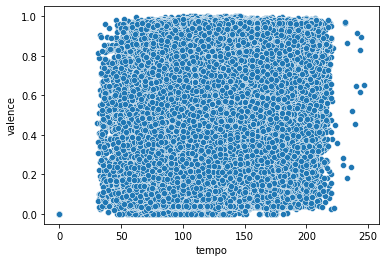

In [28]:
sns.scatterplot(x='tempo', y='valence', data=tracks)

<Figure size 1296x1008 with 0 Axes>

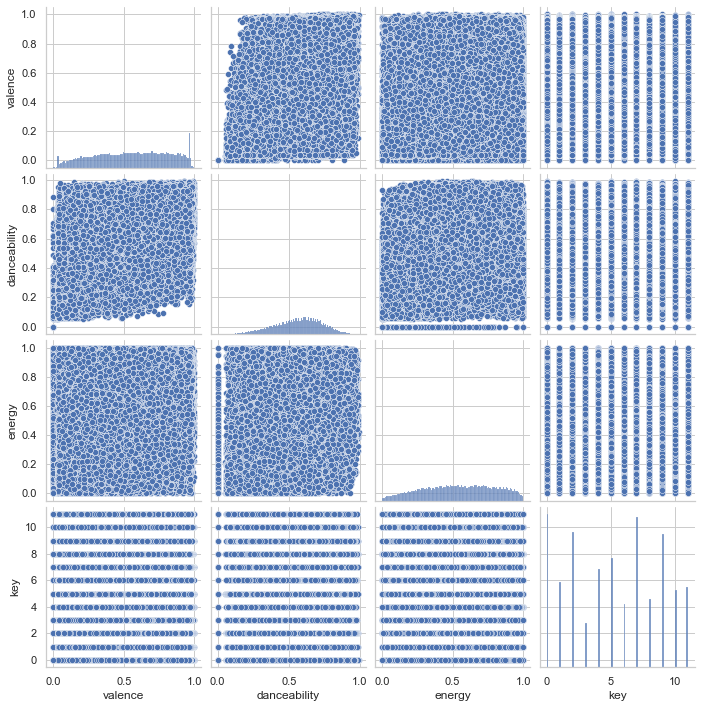

In [29]:
plt.figure(figsize=(18, 14))
sns.set(style="whitegrid")
cols = ["valence","danceability","energy", "key"]
sns.pairplot(tracks[cols], height = 2.5 )
plt.show();
#"acousticness","instrumentalness","loudness","speechiness"

<Figure size 1296x1008 with 0 Axes>

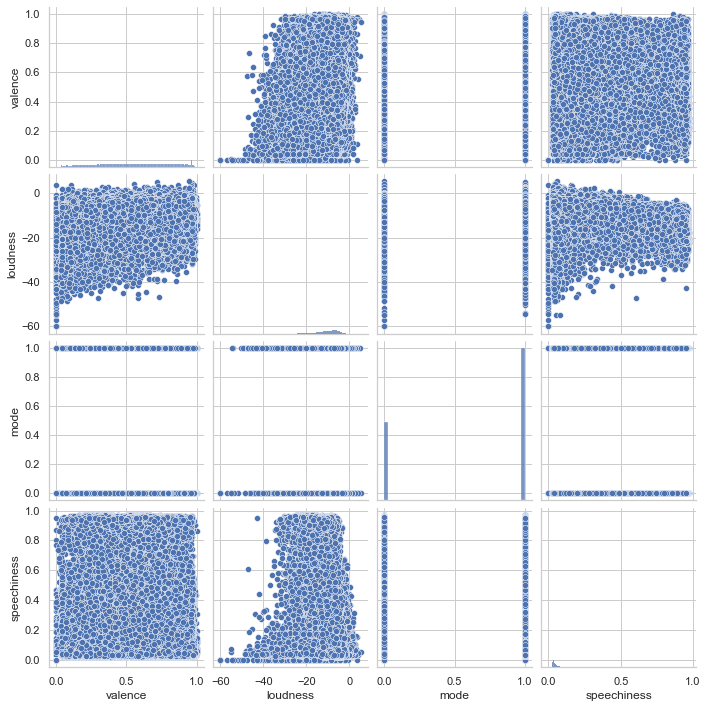

In [30]:
plt.figure(figsize=(18, 14))
sns.set(style="whitegrid")
cols = ["valence","loudness", "mode", "speechiness"]
sns.pairplot(tracks[cols], height = 2.5 )
plt.show();

<Figure size 1296x1008 with 0 Axes>

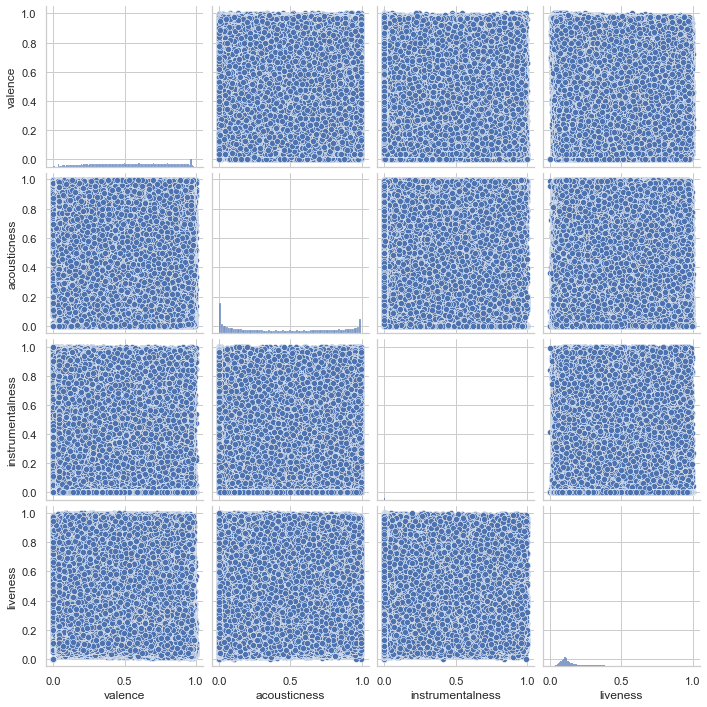

In [31]:
plt.figure(figsize=(18, 14))
sns.set(style="whitegrid")
cols = ["valence","acousticness", "instrumentalness", "liveness"]
sns.pairplot(tracks[cols], height = 2.5 )
plt.show();

By creating a corplot for the "tracks" dataframe variables, with both the Spearman correlation coefficient and the Pearson correlation coefficient, I notice that the valence variable has a moderately positive linear correlation with the danceability variable and weak positive linear correlation with energy and loudness variables.

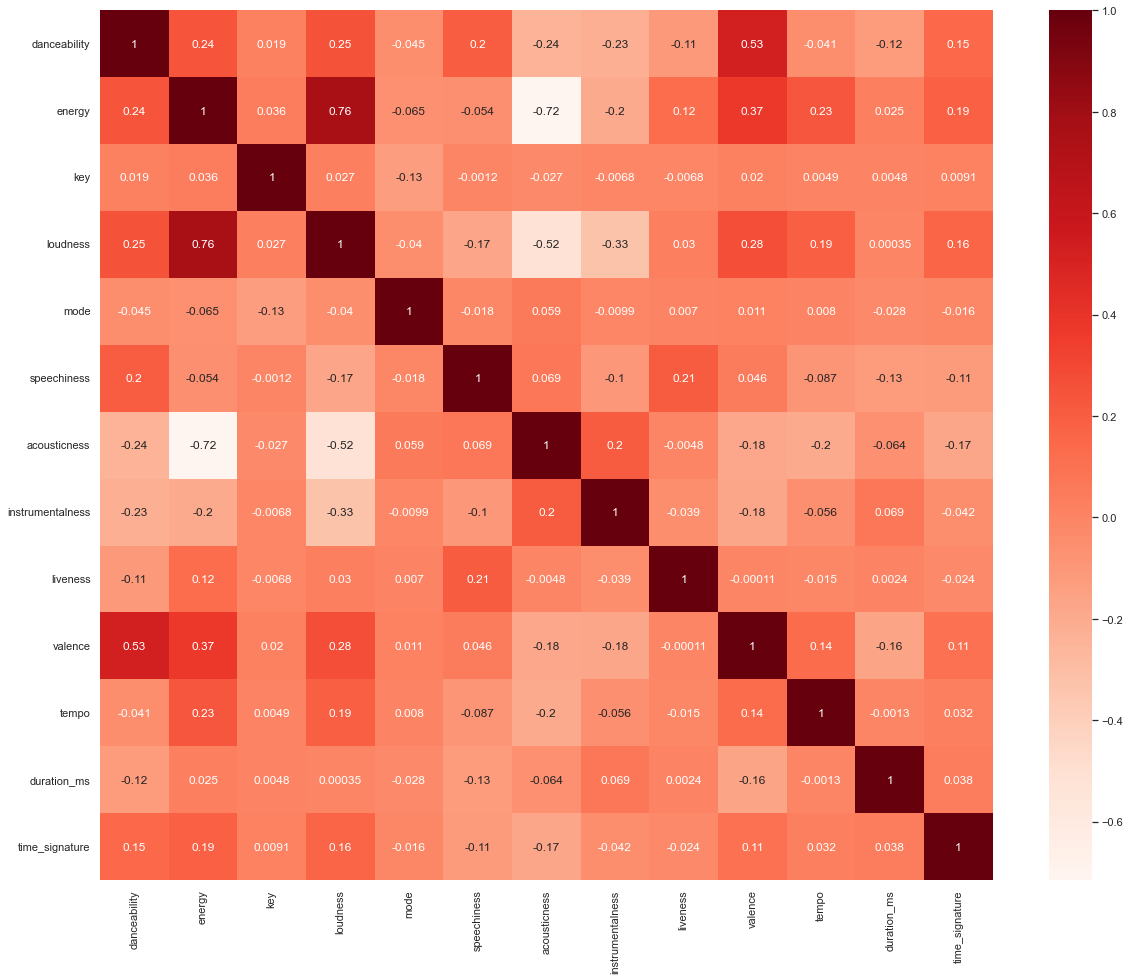

In [32]:
plt.figure(figsize=(20,16))
cor = tracks.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

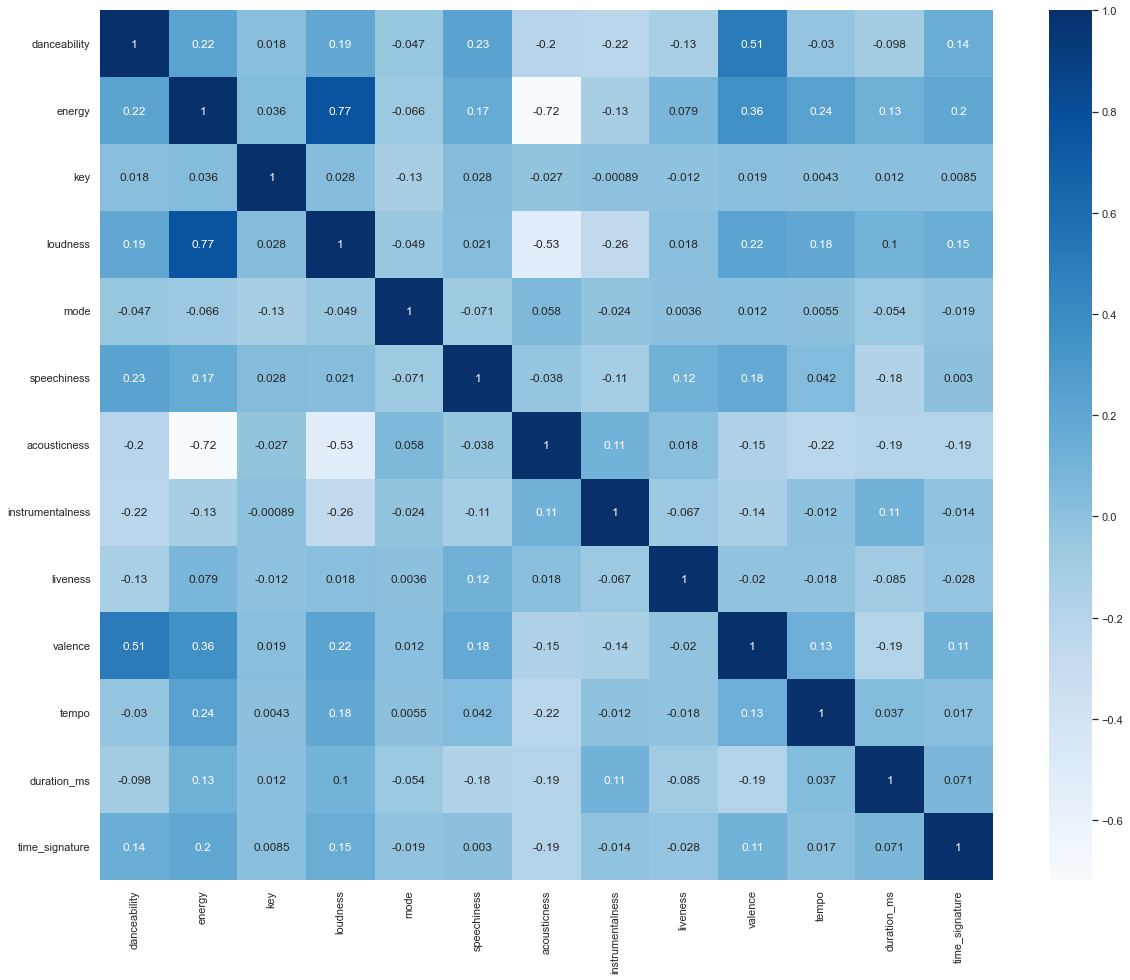

In [33]:
plt.figure(figsize=(20,16))
cor = tracks.corr(method="spearman")
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

Because I would like to create a linear model to explain the correlation between the valence variable (dependent variable) and the other variables (independent variables) I will use `stepwise` precedure. The `stepwise` method indicates which variables are statistically significant and should be used in the model. In the stepwise method we either start with the complete model and in each iteration a variable is removed (`Backward`) or we start from the null model and in each iteration a variable (`Forward`) is added.

### Stepwise (forward)

In [34]:
def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].values
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr

In [35]:
def forward_add_variable(data, exog, selected, to_select):
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]
    
    for column in to_select:
        new_selected = selected + [column]
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column
    
    return best_model, best_column

In [36]:
def forward_stepwise_selection(data, exog):

    best_models = []
    best_model = None
    selected = []
    to_select = [ x for x in data.columns if x != exog ]

    p = len(to_select) + 1

    for i in range(1, p):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model, best_column = forward_add_variable(data, exog, selected, to_select)
        selected.append(best_column)
        to_select.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected)
        best_models.append(model)
        
    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

In [37]:
best_model, _ = forward_stepwise_selection(tracks, 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 1 variable
['danceability']
Finding the best model for 2 variables
['danceability', 'energy']
Finding the best model for 3 variables
['danceability', 'energy', 'acousticness']
Finding the best model for 4 variables
['danceability', 'energy', 'acousticness', 'tempo']
Finding the best model for 5 variables
['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms']
Finding the best model for 6 variables
['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms', 'loudness']
Finding the best model for 7 variables
['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms', 'loudness', 'speechiness']
Finding the best model for 8 variables
['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms', 'loudness', 'speechiness', 'instrumentalness']
Finding the best model for 9 variables
['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms', 'loudness', 'speechiness', 'instrumentalness', 'mode']
Finding the best model for 10 varia

### Stepwise (backward)

In [38]:
def backward_remove_variable(data, exog, selected):
    
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]
    
    for column in selected:
        new_selected = selected[:]
        new_selected.remove(column)
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column
    
    return best_model, best_column

In [39]:
def backward_stepwise_selection(data, exog):

    best_models = []
    selected = [ x for x in data.columns if x != exog ]

    p = len(selected) + 1

    print(f'Finding the best model for {p - 1} variables')
    print(selected)
    y = data.loc[:, exog]
    best_model = process_subset(y, data, selected)
    best_models.append(best_model)

    for i in reversed(range(2, p)):
        print(f'Finding the best model for {i - 1} variable{"s" if (i - 1) > 1 else ""}')
        model, best_column = backward_remove_variable(data, exog, selected)
        selected.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected)
        best_models.append(model)
        
    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

In [40]:
best_model, _ = backward_stepwise_selection(tracks, 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 12 variables
['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature']
Finding the best model for 11 variables
['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']
Finding the best model for 10 variables
['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']
Finding the best model for 9 variables
['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'tempo', 'duration_ms']
Finding the best model for 8 variables
['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'tempo', 'duration_ms']
Finding the best model for 7 variables
['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'tempo', 'duration_ms']

I notice that with both methods Stepwise did not remove any variables. It concluded that the best model is the one that contains all the variables. Therefore all variables are important for the creation of the model.

### Linear Regression model

In [41]:
x = tracks.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature']]
x

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,acousticness,instrumentalness,liveness,tempo,duration_ms,time_signature
0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,104.851,0.674,0.744000,0.1510,104.851,126903,3
1,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,102.009,0.797,0.000000,0.1480,102.009,98200,1
2,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,130.418,0.994,0.021800,0.2120,130.418,181640,5
3,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,169.980,0.995,0.918000,0.1040,169.980,176907,3
4,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,103.220,0.989,0.130000,0.3110,103.220,163080,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,131.896,0.785,0.000000,0.0648,131.896,258267,4
586668,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,150.091,0.141,0.000297,0.0924,150.091,153293,4
586669,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,145.095,0.895,0.000150,0.0874,145.095,187601,4
586670,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,90.029,0.206,0.000003,0.3050,90.029,142003,4


Δημιουργώ το γραμμικό μοντέλο. Παρατηρώ οτι όλες οι εξαρτημένες μεταβλητές είναι στατιστικά σημαντικές καθώς το P>|t| = 0.

In [42]:
model = smf.ols("valence ~  danceability + energy + key + loudness + mode + speechiness + acousticness + instrumentalness + liveness + tempo + duration_ms + time_signature", data=tracks)
model_residuals = model.fit()
model_residuals.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                 3.388e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:51:39   Log-Likelihood:             1.1753e+05
No. Observations:              586672   AIC:                        -2.350e+05
Df Residuals:                  586659   BIC:                        -2.349e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4213      0.003   -125.110      0.000      -0.428      -0.415
danceability         0.7842      0.002    447.885      0.000       0.781       0.788
energy               0.5552      0.002    271.344      0.000       0.551       0.559
key                  0.0006   7.41e-05      7.787      0.000       0.000       0.001
loudness            -0.0092    8.6e-05   -107.337      0.000      -0.009      -0.009
mode                 0.0225      0.001     40.847      0.000       0.021       0.024
speechiness         -0.1237      0.002    -77.270      0.000      -0.127      -0.121
acousticness         0.1960      0.001    179.541      0.000       0.194       0.198
instrumentalness    -0.0620      0.001    -58.178      0.000      -0.064      -0.060
liveness             0.0133      0.001      8.902      0.000       0.010       0.016
tempo                0.0009   9.02e-06    101.863      0.000       0.001       0.001
duration_ms      -2.107e-07   2.08e-09   -101.196      0.000   -2.15e-07   -2.07e-07
time_signature      -0.0033      0.001     -5.885      0.000      -0.004      -0.002
==============================================================================
Omnibus:                     4624.093   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4655.170
Skew:                          -0.208   Prob(JB):                         0.00
Kurtosis:                       2.871   Cond. No.                     3.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The Model is the following:

```valence ~ - 0.4213 + 0.7842*danceability + 0.5552*energy + 0.0006*key - 0.0092*loudness + 0.0225*mode - 0.1237*speechiness + 0.1960*acousticness - 0.0620*instrumentalness + 0.0133*liveness + 0.0009*tempo - 0.00000020107*duration_ms - 0.0033*time_signature```

### Ερμηνεία του μοντέλου

* bo (intercept) interpretation: When all the coefficients of the independent variables Xi are equal to 0 (when all Coefficients are equal to 0) then the valence is equal to - 0.4213. Of course this does not make sense as valence takes values at [0,1]. So we can do 2 things in order to fix it. The 1st is to centrilize in order to have interpretability for bo and the 2nd is to remove the bo from the model.


* interpretation of the variable `danceability`
A unit of increase of the danceability variable results in an increase of 0.7842 points in the valence when the coefficients of the other variables remain constant.


* interpretation of the variable `energy`
A unit of increase of the energy variable results in an increase of 0.5552 units in valence when the coefficients of the other variables remain constant.


* interpretation of the variable `key`
A unit of increase of the key variable results in an increase of 0.0006 units in valence when the coefficients of the other variables remain constant.


* interpretation of the variable `loudness`
A unit of increase of the loudness variable results in a decrease of 0.0092 units in valence when the coefficients of the other variables remain constant.


* interpretation of the variable `mode`
A unit increase of the variable mode results in an increase of 0.0225 units in the valence when the coefficients of the other variables remain constant.


* interpretation of the variable `speechiness`
A unit of increase of the speechiness variable results in a decrease of 0.1237 units in valence when the coefficients of the other variables remain constant.


* interpretation of the variable `acousticness`
An increase in the acousticity variable results in an increase of 0.196 units in the valence when the coefficients of the other variables remain constant.


* interpretation of the variable `instrumentalness`
A unit of increase of the variable instrumentalness results in a decrease of 0.0620 units in valence when the coefficients of the other variables remain constant.


* interpretation of the variable `liveness`
A unit of increase of the liveness variable results in an increase of 0.0133 units in valence when the coefficients of the other variables remain constant.


* interpretation of the variable `tempo`
A unit of increase of the tempo variable results in an increase of 0.0009 units in valence when the coefficients of the other variables remain constant.


* interpretation of the variable `duration_ms`
A unit of increase of the variable duration_ms results in a decrease of 0.00000020107 units in valence when the coefficients of the other variables remain constant.


* interpretation of the variable `duration_ms`
A unit of increase of the variable duration_ms results in a decrease of 0.0033 units in valence when the coefficients of the other variables remain constant.

By observing the absolute values of the Coefficients, I understand that the variables dancebility and energy affect (positively) more than the others variables, the dependent variable valence. The variables acousticness and speechiness that affect the variable valence positively and negatively respectively.

In [43]:
model5 = smf.ols("valence ~  danceability + energy + mode + speechiness + acousticness + instrumentalness + liveness  + acousticness + instrumentalness + liveness + tempo", data=tracks)
model5_residuals = model.fit()
model5_residuals.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                 3.388e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:51:40   Log-Likelihood:             1.1753e+05
No. Observations:              586672   AIC:                        -2.350e+05
Df Residuals:                  586659   BIC:                        -2.349e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4213      0.003   -125.110      0.000      -0.428      -0.415
danceability         0.7842      0.002    447.885      0.000       0.781       0.788
energy               0.5552      0.002    271.344      0.000       0.551       0.559
key                  0.0006   7.41e-05      7.787      0.000       0.000       0.001
loudness            -0.0092    8.6e-05   -107.337      0.000      -0.009      -0.009
mode                 0.0225      0.001     40.847      0.000       0.021       0.024
speechiness         -0.1237      0.002    -77.270      0.000      -0.127      -0.121
acousticness         0.1960      0.001    179.541      0.000       0.194       0.198
instrumentalness    -0.0620      0.001    -58.178      0.000      -0.064      -0.060
liveness             0.0133      0.001      8.902      0.000       0.010       0.016
tempo                0.0009   9.02e-06    101.863      0.000       0.001       0.001
duration_ms      -2.107e-07   2.08e-09   -101.196      0.000   -2.15e-07   -2.07e-07
time_signature      -0.0033      0.001     -5.885      0.000      -0.004      -0.002
==============================================================================
Omnibus:                     4624.093   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4655.170
Skew:                          -0.208   Prob(JB):                         0.00
Kurtosis:                       2.871   Cond. No.                     3.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### VIF

I check for multilinearity between variables. This means that if one variable contains enough information from another variable. This variable should be removed from the model because it affects the model and more specifically affects the assumptions of the model.

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(tracks.iloc[:, tracks.columns != 'valence'])
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns)

const               169.602951
danceability          1.265119
energy                3.975247
key                   1.017978
loudness              2.868501
mode                  1.024662
speechiness           1.239993
acousticness          2.169766
instrumentalness      1.211534
liveness              1.126188
tempo                 1.078037
duration_ms           1.039812
time_signature        1.070380
dtype: float64

### Residuals

From the following graph I understand that the normality assumption is not valid because one point I notice a call from the line (of the normal distribution).

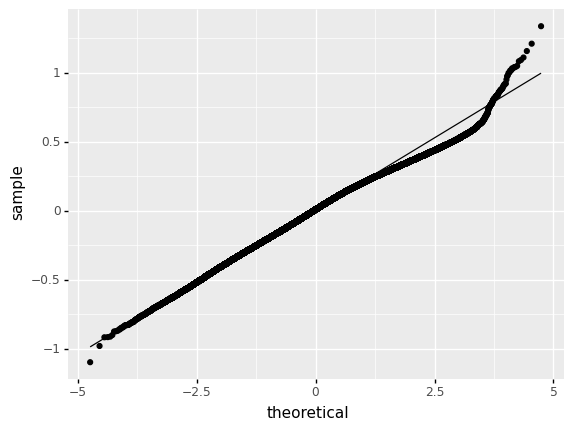

<ggplot: (152215110184)>

In [45]:
ggplot(data=model_residuals.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
    geom_qq_line(mapping=aes(sample='resid'))

In the graph below I see that homoscedasticity is not valid as residuals do not spread randomly in space.

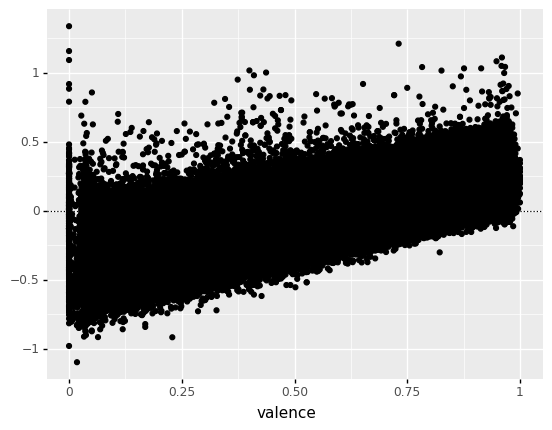

<ggplot: (152213718492)>

In [46]:
ggplot(data=tracks) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x= 'valence', y=model_residuals.resid))

In the next graph I see that the linearity in the model is not valid as the residuals should be randomly close to zero along the dashed line.

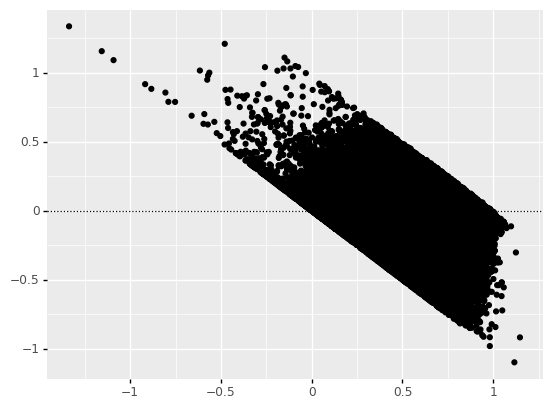

<ggplot: (152207609052)>

In [47]:
ggplot(data=tracks) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x= model_residuals.fittedvalues, y=model_residuals.resid))

The same charts as the seaborn library.

<AxesSubplot:>

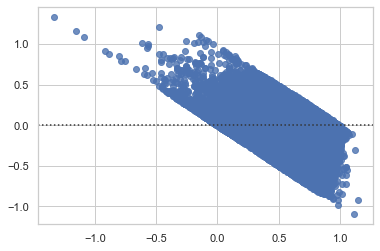

In [48]:
sns.residplot(x=model_residuals.fittedvalues, y=model_residuals.resid)

<AxesSubplot:xlabel='valence'>

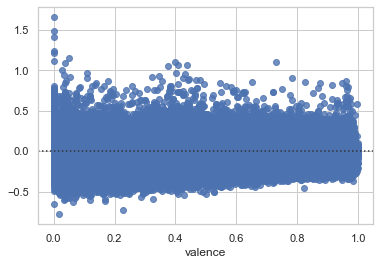

In [49]:
sns.residplot(x=tracks.valence, y=model_residuals.resid)

So the model would normally need transformations such as power rise of some dependent variables so as the assumptions to be validated.

## Q2: Predict Valence

In this task the aim is to make different prediction models from different Machine Learning methods for predicting the valence variable.

First I convert the key variable to dummies.

In [50]:
tracks = pd.get_dummies(tracks, columns=['key'])
tracks

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.645,0.4450,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,126903,3,1,0,0,0,0,0,0,0,0,0,0,0
1,0.695,0.2630,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,98200,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0.434,0.1770,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,181640,5,0,1,0,0,0,0,0,0,0,0,0,0
3,0.321,0.0946,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,176907,3,0,0,0,0,0,0,0,1,0,0,0,0
4,0.402,0.1580,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,163080,4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,0.560,0.5180,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,258267,4,1,0,0,0,0,0,0,0,0,0,0,0
586668,0.765,0.6630,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,153293,4,1,0,0,0,0,0,0,0,0,0,0,0
586669,0.535,0.3140,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,187601,4,0,0,0,0,0,0,0,1,0,0,0,0
586670,0.696,0.6150,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,142003,4,0,0,0,0,0,0,0,0,0,0,1,0


I change the order of the variables in the dataframe so that the variable I want to predict is at the end.

In [51]:
tracks = tracks[['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature','key_0', 
                'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'valence']]

I shuffle the data to make sure there is randomness in the order of the observations in the dataframe.

In [52]:
tracks = tracks.sample(frac=1)
tracks = tracks.reset_index(drop=True)

I divide into X and y, where X contains all the numerical variables except the target variable which is the valence variable. The variable valence is contained in y. Then I break into test and train with a percentage of 70% - 30%.

In [53]:
from sklearn.model_selection import train_test_split

X, y = (tracks[['danceability', 'danceability', 'loudness', 'mode', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature', 'key_0', 
                'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11']].values, 
        tracks['valence'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=33)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(410670, 23) (410670,)
(176002, 23) (176002,)


 Because some machine learning methods are quite slow when there is a lot of data, I create a second dataframe, called `tracks2`, that contains the first 150,000 lines from the `tracks` dataframe and repeat the above process.

In [54]:
tracks2 = tracks.loc[0:150000, :]


In [55]:
from sklearn.model_selection import train_test_split

X1, y1 = (tracks2[['danceability', 'danceability', 'loudness', 'mode', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature', 'key_0', 
                'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11']].values, 
        tracks2['valence'].values)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, 
                                                    random_state=33)

print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_test.shape)

(105000, 23) (105000,)
(45001, 23) (45001,)


The machine learning methods I will choose are for Regression and not for Classification as my goal is price prediction and not "clustering".

### Decision Tree Regressor

I start creating models with the `Decision Tree Regressor` machine learning method.

In [56]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In this method of machine learning it is very important to find the optimal depth of the tree to have a better result.

In [57]:
from sklearn.model_selection import cross_val_score, KFold

from scipy.stats import sem

all_depths = []
all_mean_scores = []

for max_depth in range(1, 13):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    cv = KFold(n_splits=5, shuffle=True, random_state=13)
    scores = cross_val_score(simple_tree, X, y, cv=cv)
    mean_score = np.mean(scores)
    all_mean_scores.append(np.mean(scores))
    print("max_depth = ", max_depth, scores, mean_score, sem(scores))

max_depth =  1 [0.18438055 0.18552183 0.18838083 0.18892911 0.19034546] 0.1875115589747682 0.0011081139646685332
max_depth =  2 [0.25601361 0.25747525 0.2592022  0.26291167 0.26118282] 0.2593571100662214 0.0012392037996537646
max_depth =  3 [0.29384902 0.29480443 0.29803858 0.30086754 0.2979968 ] 0.2971112762710262 0.0012593123341180924
max_depth =  4 [0.32314861 0.32339243 0.32861915 0.33011063 0.32688618] 0.32643139891798784 0.001388198027434806
max_depth =  5 [0.34879072 0.34832965 0.35095883 0.35383118 0.35273546] 0.3509291669858906 0.001072746230200311
max_depth =  6 [0.36739161 0.36682725 0.36960364 0.37320322 0.37167135] 0.3697394151528318 0.0012194609431420704
max_depth =  7 [0.38253616 0.38288365 0.38320593 0.38749485 0.38642516] 0.38450915047344303 0.0010202647136309739
max_depth =  8 [0.3946245  0.39413052 0.39600853 0.3992357  0.39814513] 0.39642887851061637 0.0009884001592037003
max_depth =  9 [0.40554977 0.40499283 0.40649447 0.40923948 0.40948234] 0.4071517777346797 0.00

The following code calculates the hyperparameter max_depth as above, with the difference that I can not observe and compare the scores for each depth.

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

parameters = [
  {'max_depth': list(range(1, 13))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(X, y)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=11)
{'max_depth': 11}


I create three models. One with the maximum depth I found above as well as with two other tests to compare the mean absolute error for X_train and X_test.

In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

regr_8 = DecisionTreeRegressor(max_depth=8)
regr_10 = DecisionTreeRegressor(max_depth=10)
regr_11 = DecisionTreeRegressor(max_depth=11)

regr_8.fit(X_train, y_train)
regr_10.fit(X_train, y_train)
regr_11.fit(X_train, y_train)

dae_train1 = mean_absolute_error(y_train, regr_8.predict(X_train))
print(dae_train1)
dae_train = mean_absolute_error(y_train, regr_10.predict(X_train))
print(dae_train)
dae_train2 = mean_absolute_error(y_train, regr_11.predict(X_train))
print(dae_train2)

print('')

dae_test1 = mean_absolute_error(y_test, regr_8.predict(X_test))
print(dae_test1)
dae_test = mean_absolute_error(y_test, regr_10.predict(X_test))
print(dae_test)
dae_test2 = mean_absolute_error(y_test, regr_11.predict(X_test))
print(dae_test2)

0.16099981496090504
0.15560165717025684
0.15243880807399623

0.16238904097701937
0.15895837499073456
0.15794920108587734


I notice that `mean_absolute_error` is larger in X_test. This always happens in every machine learning methods.

I use the  `GridSearchCV` function to find the value of the hyperparameter min_samples_leaf.

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor

parameters = [
  {'min_samples_leaf': list(range(5, 22))
  }
 ]


cv = KFold(n_splits=2, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv, verbose = 3)

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

Fitting 2 folds for each of 17 candidates, totalling 34 fits
[CV 1/2] END ................min_samples_leaf=5;, score=0.185 total time=   3.6s
[CV 2/2] END ................min_samples_leaf=5;, score=0.191 total time=   3.4s
[CV 1/2] END ................min_samples_leaf=6;, score=0.217 total time=   3.3s
[CV 2/2] END ................min_samples_leaf=6;, score=0.221 total time=   3.4s
[CV 1/2] END ................min_samples_leaf=7;, score=0.244 total time=   3.7s
[CV 2/2] END ................min_samples_leaf=7;, score=0.247 total time=   3.8s
[CV 1/2] END ................min_samples_leaf=8;, score=0.265 total time=   4.2s
[CV 2/2] END ................min_samples_leaf=8;, score=0.266 total time=   4.7s
[CV 1/2] END ................min_samples_leaf=9;, score=0.284 total time=   4.7s
[CV 2/2] END ................min_samples_leaf=9;, score=0.286 total time=   4.3s
[CV 1/2] END ...............min_samples_leaf=10;, score=0.297 total time=   3.3s
[CV 2/2] END ...............min_samples_leaf=10;

I create new models by adding the hyper parameter min_samples_leaf which have been calculated from Grid Search. I found that the best value for this hyper parameter is 21.

I also initially try for min_samples_leaf = 20 to see the difference in `mean_absolute_error`

In [60]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_10 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=20)
regr_11 = DecisionTreeRegressor(max_depth=11, min_samples_leaf=20)
regr_112 = DecisionTreeRegressor(max_depth=11, min_samples_leaf=20)


regr_10.fit(X, y)
regr_11.fit(X, y)
regr_112.fit(X, y)

# Predict
y_10 = regr_10.predict(X_test)
y_11 = regr_11.predict(X_test)
y_112 = regr_112.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_10))
print(mean_absolute_error(y_test,y_11))
print(mean_absolute_error(y_test,y_112))

0.15638141065230096
0.15386154488092865
0.15386154488092865


In [63]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_13 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=21)
regr_14 = DecisionTreeRegressor(max_depth=11, min_samples_leaf=21)
regr_113 = DecisionTreeRegressor(max_depth=11, min_samples_leaf=21)


regr_13.fit(X, y)
regr_14 = regr_14.fit(X, y)
regr_113.fit(X, y)

# Predict
y_13 = regr_13.predict(X_test)
y_14 = regr_14.predict(X_test)
y_113 = regr_113.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_13))
print(mean_absolute_error(y_test,y_14))
print(mean_absolute_error(y_test,y_113))

0.1563798414207382
0.15387352762729686
0.15387352762729684


I create a model with max_depth = 4 in order to represent it.

In [64]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_0 = DecisionTreeRegressor(max_depth=4)

regr_0.fit(X, y)

# Predict
y_0 = regr_0.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_0))

0.17358276913655216


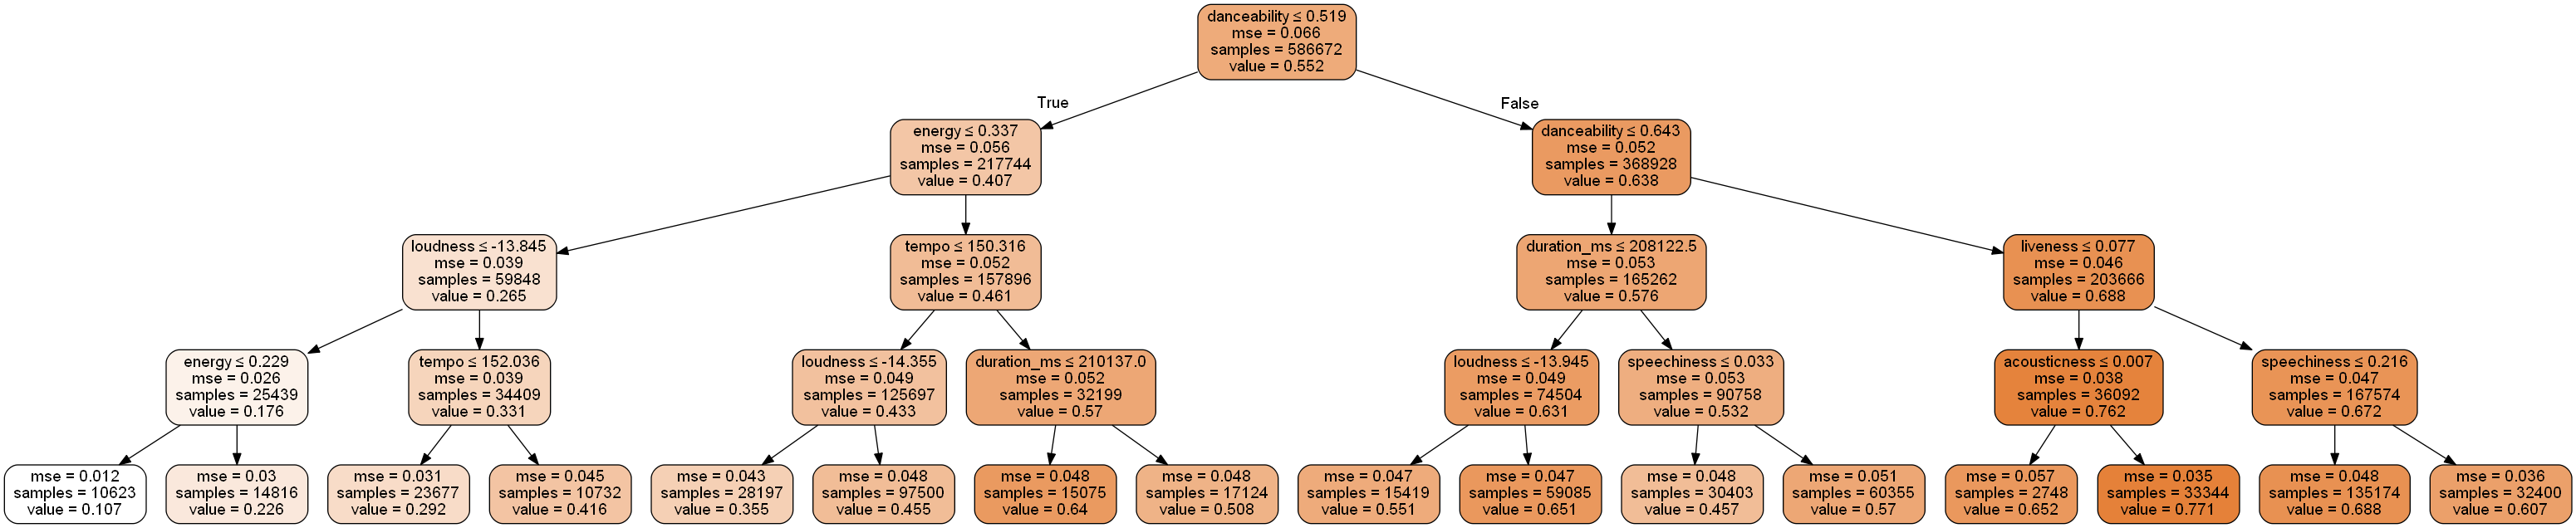

In [66]:
from sklearn import tree
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(regr_0, out_file=dot_data,  
                     feature_names=tracks.columns[:-1], 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

Then I see the differences between the actual values of the valence variable and the values predicted by the `regr_14` model where it had the smallest mean_absolute_error compared to the rest models.

In [67]:
#Real Values - Predicted Values

df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':regr_14.predict(X_test).reshape(-1)})
df

,Real Values,Predicted Values
0,0.793,0.799725
1,0.961,0.806125
2,0.223,0.610290
3,0.224,0.354547
4,0.630,0.290677
...,...,...
175997,0.778,0.643995
175998,0.445,0.715443
175999,0.188,0.573216
176000,0.963,0.713547


### Variables that affect the valence variable

For the regr_14 model the variables that affect more the valence variable are the variables danceability, energy. The variables loudness, speechiness, acousticness, liveness, tempo and duration_ms have less influence.

In [72]:
from sklearn.inspection import permutation_importance

print(dict(zip(tracks.columns, regr_14.feature_importances_)))

{'danceability': 0.5112191918915784, 'energy': 0.1156960751223817, 'loudness': 0.06415276547219835, 'mode': 0.0007807262605930935, 'speechiness': 0.07543265161121185, 'acousticness': 0.039147423082999414, 'instrumentalness': 0.01591179649382643, 'liveness': 0.044012664172833345, 'tempo': 0.06119619778163898, 'duration_ms': 0.07093169285569982, 'time_signature': 0.0005776916140486196, 'key_0': 6.554310455697979e-05, 'key_1': 0.0005854887705496176, 'key_2': 0.0, 'key_3': 1.5837714592851933e-05, 'key_4': 0.0, 'key_5': 0.0, 'key_6': 4.944916255926778e-05, 'key_7': 0.00021306153823698182, 'key_8': 0.0, 'key_9': 0.0, 'key_10': 1.1743350494412969e-05, 'key_11': 0.0}


I build a model with the same hyperparameters but with the difference that the data has been scaled. Of course in methods that are based on "trees" creation, the data is not needed to be scaled because these methods aren't affected by that. In other methods, however, it is necessary.

In [73]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

decision_tree_scaled_model = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth = 11, min_samples_leaf=21))
decision_tree_scaled_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=11, min_samples_leaf=21))])

In [74]:
from sklearn.metrics import mean_absolute_error

scaled_model = decision_tree_scaled_model.predict(X_test)
print(scaled_model)

print(mean_absolute_error(y_test,scaled_model))

[0.80400912 0.80592608 0.60827384 ... 0.56672186 0.70441351 0.38411667]
0.15779854582363848


### RANDOM FOREST

The next method is the `Random Forest Regressor`. 

I build different models by trying different hyperparameters in order to find the the model with the smallest mean_absolute_error in X_test but without too small mean_absolute_error in X_train. If this happens it is an indication that the model overfits. To explain it more, the model learns so well the data we have given him without being able to generalize to out of sample data. Of course I will test the models in out of sample dataset to be able to conclude if they are overfitting models or not.

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

regressor = RandomForestRegressor(random_state = 0)
regressor.fit(X_train, y_train)

pred_train = regressor.predict(X_train)
print(pred_train)
print(mean_absolute_error(y_train, pred_train))

pred_test = regressor.predict(X_test)
print(pred_test)
print(mean_absolute_error(y_test, pred_test))

[0.40857  0.2395   0.076998 ... 0.196615 0.20237  0.37263 ]
0.05254900840441978
[0.7769   0.7793   0.49274  ... 0.458009 0.92514  0.29155 ]
0.14212711533467448


I notice the differences between the actual values of the valence variable and the values predicted by the regressor model with the smallest mean_absolute_error compared to the rest in this machine learning method.

In [76]:
df1 = pd.DataFrame({'Real Values':y_train, 'Predicted Values':pred_train})
df1

,Real Values,Predicted Values
0,0.4200,0.408570
1,0.2060,0.239500
2,0.0628,0.076998
3,0.8190,0.772950
4,0.2690,0.296020
...,...,...
410665,0.3260,0.343523
410666,0.5430,0.469489
410667,0.1650,0.196615
410668,0.0900,0.202370


I test models by putting different values in the hyperparameters.

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

regressor = RandomForestRegressor(max_depth = 4, random_state = 0)
regressor.fit(X_train, y_train)

pred_train = regressor.predict(X_train)
print(pred_train)
print(mean_absolute_error(y_train, pred_train))

pred_test = regressor.predict(X_test)
print(pred_test)
print(mean_absolute_error(y_test, pred_test))


df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':pred_test})
df

[0.44804361 0.34582315 0.10864298 ... 0.45679855 0.49970622 0.41192805]
0.17229638696099536
[0.68967358 0.77274924 0.49970622 ... 0.44804361 0.68837685 0.5823766 ]
0.17246917337721168


,Real Values,Predicted Values
0,0.793,0.689674
1,0.961,0.772749
2,0.223,0.499706
3,0.224,0.362664
4,0.630,0.274615
...,...,...
175997,0.778,0.623352
175998,0.445,0.570714
175999,0.188,0.448044
176000,0.963,0.688377


In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

regressor1 = RandomForestRegressor(n_estimators = 500, max_depth = 7, random_state = 0)
regressor1.fit(X_train, y_train)

pred_train1 = regressor1.predict(X_train)
print(pred_train1)
print(mean_absolute_error(y_train, pred_train1))

pred_test1 = regressor.predict(X_test)
print(pred_test1)
print(mean_absolute_error(y_test, pred_test1))

[0.42343854 0.3172662  0.09291557 ... 0.36803421 0.42686428 0.43147844]
0.16182245173869592
[0.68967358 0.77274924 0.49970622 ... 0.44804361 0.68837685 0.5823766 ]
0.17246917337721168


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

regressor2 = RandomForestRegressor(n_estimators = 600, max_depth = 11, random_state = 0)
regressor2.fit(X_train, y_train)

pred_train2 = regressor2.predict(X_train)
print(pred_train2)
print(mean_absolute_error(y_train, pred_train2))

pred_test2 = regressor.predict(X_test)
print(pred_test2)
print(mean_absolute_error(y_test, pred_test2))

[0.44100128 0.32354563 0.10910539 ... 0.31418223 0.4156451  0.31591696]
0.14950005228880725
[0.68967358 0.77274924 0.49970622 ... 0.44804361 0.68837685 0.5823766 ]
0.17246917337721168


In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

regressor3 = RandomForestRegressor(n_estimators = 500, max_depth = 12, random_state = 0)
regressor3.fit(X1_train, y1_train)

pred_train3 = regressor3.predict(X1_train)
print(pred_train3)
print(mean_absolute_error(y1_train, pred_train3))

pred_test3 = regressor3.predict(X1_test)
print(pred_test3)
print(mean_absolute_error(y1_test, pred_test3))


[0.57363257 0.45952847 0.3752032  ... 0.08274033 0.6408292  0.3236858 ]
0.1365041039104451
[0.67636664 0.72727151 0.4075291  ... 0.64102595 0.66964226 0.38497896]
0.15263920315725338


### Variables that affect the valence variable

For the regressor model the variables that affect more the valence variable are the variables danceability, energy. The variables loudness, speechiness, liveness, tempo and duration_ms have less influence.

In [173]:
from sklearn.inspection import permutation_importance

print(dict(zip(tracks.columns, regressor.feature_importances_)))

{'danceability': 0.3823417541689543, 'energy': 0.41618547577573184, 'loudness': 0.04868770844776754, 'mode': 0.0, 'speechiness': 0.03772881854512046, 'acousticness': 0.0013913543057591884, 'instrumentalness': 0.0, 'liveness': 0.017258230264632288, 'tempo': 0.05128917414317269, 'duration_ms': 0.04511748434886174, 'time_signature': 0.0, 'key_0': 0.0, 'key_1': 0.0, 'key_2': 0.0, 'key_3': 0.0, 'key_4': 0.0, 'key_5': 0.0, 'key_6': 0.0, 'key_7': 0.0, 'key_8': 0.0, 'key_9': 0.0, 'key_10': 0.0, 'key_11': 0.0}


### XGBoost Regressor

The next method is the ```XGBoost Regressor```. 

I use the `GridSearchCV` command to find the values for `max_depth`, `n_estimators` hyperparameters and then I try different models with both the parameter values I got from `GridSearchCV` and tests with other values in order to notice the differences in mean absolute error in X_train and X_test.

In [85]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

parameters = [
  {'max_depth': list(range(6, 20))
  }
 ]


cv = KFold(n_splits=5, shuffle=True, random_state=13)
k = GridSearchCV(xgb.XGBRegressor(), parameters, cv=cv, verbose = 3)

k = k.fit(X, y)
print(clf.best_estimator_)
print(clf.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END .......................max_depth=6;, score=0.486 total time=  27.6s
[CV 2/5] END .......................max_depth=6;, score=0.487 total time=  27.0s
[CV 3/5] END .......................max_depth=6;, score=0.490 total time=  28.4s
[CV 4/5] END .......................max_depth=6;, score=0.491 total time=  23.9s
[CV 5/5] END .......................max_depth=6;, score=0.491 total time=  27.4s
[CV 1/5] END .......................max_depth=7;, score=0.490 total time=  30.9s
[CV 2/5] END .......................max_depth=7;, score=0.490 total time=  31.6s
[CV 3/5] END .......................max_depth=7;, score=0.492 total time=  31.6s
[CV 4/5] END .......................max_depth=7;, score=0.494 total time=  31.7s
[CV 5/5] END .......................max_depth=7;, score=0.494 total time=  29.3s
[CV 1/5] END .......................max_depth=8;, score=0.492 total time=  34.1s
[CV 2/5] END .......................max_depth=8;

In [86]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

parameters = [
  {'max_depth': [8],
   'n_estimators' : [100, 150, 200, 300, 400, 500, 600]
  }
 ]


cv = KFold(n_splits=2, shuffle=True, random_state=13)
k = GridSearchCV(xgb.XGBRegressor(), parameters, cv=cv, verbose = 3)

k = k.fit(X, y)
print(clf.best_estimator_)
print(clf.best_params_)

Fitting 2 folds for each of 7 candidates, totalling 14 fits
[CV 1/2] END .....max_depth=8, n_estimators=100;, score=0.485 total time=  19.4s
[CV 2/2] END .....max_depth=8, n_estimators=100;, score=0.489 total time=  18.7s
[CV 1/2] END .....max_depth=8, n_estimators=150;, score=0.485 total time=  30.8s
[CV 2/2] END .....max_depth=8, n_estimators=150;, score=0.489 total time=  28.5s
[CV 1/2] END .....max_depth=8, n_estimators=200;, score=0.484 total time=  37.2s
[CV 2/2] END .....max_depth=8, n_estimators=200;, score=0.488 total time=  36.8s
[CV 1/2] END .....max_depth=8, n_estimators=300;, score=0.481 total time=  54.9s
[CV 2/2] END .....max_depth=8, n_estimators=300;, score=0.485 total time=  52.6s
[CV 1/2] END .....max_depth=8, n_estimators=400;, score=0.478 total time= 1.2min
[CV 2/2] END .....max_depth=8, n_estimators=400;, score=0.482 total time= 1.2min
[CV 1/2] END .....max_depth=8, n_estimators=500;, score=0.476 total time= 1.5min
[CV 2/2] END .....max_depth=8, n_estimators=500;,

In [87]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth = 12, n_estimators = 150, learning_rate = 0.05)
xgb_reg.fit(X1_train, y1_train)

xgb_reg_train_pred = xgb_reg.predict(X1_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y1_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X1_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y1_test, xgb_reg_test_pred))

[0.6218949  0.5055463  0.4694157  ... 0.05774704 0.54828376 0.35332203]
0.09496653640857682
[0.7067841  0.79043794 0.40014878 ... 0.6962791  0.72461176 0.3981628 ]
0.14737478437760299


In [88]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth = 12, n_estimators = 500, learning_rate = 0.05)
xgb_reg.fit(X_train, y_train)

xgb_reg_train_pred = xgb_reg.predict(X_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y_test, xgb_reg_test_pred))

[0.44578242 0.25456703 0.10299202 ... 0.248838   0.27407235 0.32002407]
0.10093606918892617
[0.84029186 0.7499805  0.5457509  ... 0.5478256  0.8686498  0.35886735]
0.14219282749644663


In [89]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth = 12, n_estimators = 150, learning_rate = 0.05)
xgb_reg.fit(X_train, y_train)

xgb_reg_train_pred = xgb_reg.predict(X_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y_test, xgb_reg_test_pred))

[0.44930306 0.27871984 0.10434579 ... 0.27951354 0.35089952 0.28514078]
0.1182993044442326
[0.8252299  0.75175804 0.56936085 ... 0.5253841  0.81081223 0.35850397]
0.1442745023133453


In [90]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth = 7, n_estimators = 500, learning_rate = 0.05)
xgb_reg.fit(X_train, y_train)

xgb_reg_train_pred = xgb_reg.predict(X_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y_test, xgb_reg_test_pred))

[0.4669768  0.30800614 0.09906986 ... 0.28807503 0.48401278 0.25952247]
0.14038832576073354
[0.8377812 0.7579399 0.5608938 ... 0.5263752 0.7751265 0.4015631]
0.14668849882210813


In [91]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth = 8, n_estimators = 500, learning_rate = 0.05)
xgb_reg.fit(X_train, y_train)

xgb_reg_train_pred = xgb_reg.predict(X_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y_test, xgb_reg_test_pred))

[0.44795173 0.3021399  0.09876377 ... 0.27679425 0.46261263 0.24748996]
0.1360444345912146
[0.8464113  0.7655096  0.5648584  ... 0.5285943  0.80683184 0.38731572]
0.1457335251892297


In [92]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth = 9, n_estimators = 500, learning_rate = 0.05)
xgb_reg.fit(X_train, y_train)

xgb_reg_train_pred = xgb_reg.predict(X_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y_test, xgb_reg_test_pred))

[0.4593267  0.276012   0.11011163 ... 0.2663146  0.4283577  0.24132095]
0.1301463461187681
[0.8277536  0.7708169  0.5300495  ... 0.5116291  0.7957986  0.40256244]
0.1447759474057191


In [93]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth = 10, n_estimators = 500, learning_rate = 0.05)
xgb_reg.fit(X_train, y_train)

xgb_reg_train_pred = xgb_reg.predict(X_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y_test, xgb_reg_test_pred))

[0.466582   0.29156196 0.1018693  ... 0.2615836  0.4027315  0.29065907]
0.12227193642225459
[0.86396444 0.76667774 0.53401953 ... 0.52804387 0.8017124  0.37315226]
0.14394202698441494


In [94]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth = 11, n_estimators = 500, learning_rate = 0.05)
xgb_reg.fit(X_train, y_train)

xgb_reg_train_pred = xgb_reg.predict(X_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y_test, xgb_reg_test_pred))

[0.45480382 0.26229295 0.11489006 ... 0.27727598 0.3431777  0.2964688 ]
0.11273371632274462
[0.84588766 0.7906172  0.5289972  ... 0.52651614 0.85068697 0.3598537 ]
0.14311651945700596


In [95]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth = 12, n_estimators = 500, learning_rate = 0.05)
xgb_reg.fit(X_train, y_train)

xgb_reg_train_pred = xgb_reg.predict(X_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y_test, xgb_reg_test_pred))

[0.44578242 0.25456703 0.10299202 ... 0.248838   0.27407235 0.32002407]
0.10093606918892617
[0.84029186 0.7499805  0.5457509  ... 0.5478256  0.8686498  0.35886735]
0.14219282749644663


In [96]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth = 12, n_estimators = 700, learning_rate = 0.04)
xgb_reg.fit(X_train, y_train)

xgb_reg_train_pred = xgb_reg.predict(X_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y_test, xgb_reg_test_pred))

[0.4411225  0.23693006 0.10246168 ... 0.23615402 0.28992295 0.31703892]
0.09807939362014814
[0.81397206 0.78714293 0.54394114 ... 0.5475214  0.8488845  0.33147272]
0.14194254122213956


In [97]:
import xgboost as xgb

xgb_reg100 = xgb.XGBRegressor(max_depth = 12, n_estimators = 700, learning_rate = 0.05)
xgb_reg100.fit(X_train, y_train)

xgb_reg100_train_pred = xgb_reg100.predict(X_train)
print(xgb_reg100_train_pred)
print(mean_absolute_error(y_train, xgb_reg100_train_pred))

xgb_reg100_test_pred = xgb_reg100.predict(X_test)
print(xgb_reg100_test_pred)
print(mean_absolute_error(y_test, xgb_reg100_test_pred))

[0.4435333  0.26770344 0.10186754 ... 0.2507358  0.23667736 0.33062226]
0.09447386220034641
[0.834954   0.75541747 0.52774465 ... 0.55276996 0.8879303  0.35604268]
0.14180830498100294


In [98]:
import xgboost as xgb

xgb_reg101 = xgb.XGBRegressor(max_depth = 12, n_estimators = 700, learning_rate = 0.06)
xgb_reg101.fit(X_train, y_train)

xgb_reg101_train_pred = xgb_reg101.predict(X_train)
print(xgb_reg101_train_pred)
print(mean_absolute_error(y_train, xgb_reg101_train_pred))

xgb_reg101_test_pred = xgb_reg101.predict(X_test)
print(xgb_reg101_test_pred)
print(mean_absolute_error(y_test, xgb_reg101_test_pred))

[0.41170937 0.2332441  0.10044568 ... 0.24359737 0.2589569  0.32078624]
0.08863657719825198
[0.81305027 0.7641258  0.51456124 ... 0.50528216 0.85164034 0.3288511 ]
0.1415798639916627


In [99]:
import xgboost as xgb

xgb_reg102 = xgb.XGBRegressor(max_depth = 12, n_estimators = 700, learning_rate = 0.08)
xgb_reg102.fit(X_train, y_train)

xgb_reg102_train_pred = xgb_reg102.predict(X_train)
print(xgb_reg102_train_pred)
print(mean_absolute_error(y_train, xgb_reg102_train_pred))

xgb_reg102_test_pred = xgb_reg102.predict(X_test)
print(xgb_reg102_test_pred)
print(mean_absolute_error(y_test, xgb_reg102_test_pred))

[0.4313042  0.23038192 0.09228097 ... 0.26692328 0.22789888 0.32180142]
0.08170863538635091
[0.81135565 0.7595461  0.5172526  ... 0.49846575 0.8570766  0.337747  ]
0.14165568691668395


In [100]:
import xgboost as xgb

xgb_reg103 = xgb.XGBRegressor(max_depth = 12, n_estimators = 600, learning_rate = 0.09)
xgb_reg103.fit(X_train, y_train)

xgb_reg103_train_pred = xgb_reg103.predict(X_train)
print(xgb_reg103_train_pred)
print(mean_absolute_error(y_train, xgb_reg103_train_pred))

xgb_reg103_test_pred = xgb_reg103.predict(X_test)
print(xgb_reg103_test_pred)
print(mean_absolute_error(y_test, xgb_reg103_test_pred))

[0.4555454  0.24101058 0.0889058  ... 0.2393787  0.2086201  0.3004549 ]
0.08205874042332935
[0.8594184  0.7245199  0.4830772  ... 0.56184226 0.90292126 0.33808774]
0.14167229150645058


In [101]:
import xgboost as xgb

xgb_reg104 = xgb.XGBRegressor(max_depth = 12, n_estimators = 600, learning_rate = 0.1)
xgb_reg104.fit(X_train, y_train)

xgb_reg104_train_pred = xgb_reg104.predict(X_train)
print(xgb_reg104_train_pred)
print(mean_absolute_error(y_train, xgb_reg104_train_pred))

xgb_reg104_test_pred = xgb_reg104.predict(X_test)
print(xgb_reg104_test_pred)
print(mean_absolute_error(y_test, xgb_reg104_test_pred))

[0.417087   0.21566863 0.1006591  ... 0.2275219  0.23946415 0.35189393]
0.07988635417765988
[0.86143297 0.767433   0.53077555 ... 0.52735156 0.85873014 0.34499872]
0.141867505078687


In [102]:
import xgboost as xgb

xgb_reg105 = xgb.XGBRegressor(max_depth = 13, n_estimators = 600, learning_rate = 0.09)
xgb_reg105.fit(X_train, y_train)

xgb_reg105_train_pred = xgb_reg105.predict(X_train)
print(xgb_reg105_train_pred)
print(mean_absolute_error(y_train, xgb_reg105_train_pred))

xgb_reg105_test_pred = xgb_reg105.predict(X_test)
print(xgb_reg105_test_pred)
print(mean_absolute_error(y_test, xgb_reg105_test_pred))

[0.46550193 0.2598946  0.08140859 ... 0.2545418  0.17862435 0.3457144 ]
0.0666720287202119
[0.8734281  0.8102103  0.52701604 ... 0.52591336 0.8791258  0.34067747]
0.14101395904553413


In [103]:
import xgboost as xgb

xgb_reg106 = xgb.XGBRegressor(max_depth = 13, n_estimators = 600, learning_rate = 0.1)
xgb_reg106.fit(X_train, y_train)

xgb_reg106_train_pred = xgb_reg106.predict(X_train)
print(xgb_reg106_train_pred)
print(mean_absolute_error(y_train, xgb_reg106_train_pred))

xgb_reg106_test_pred = xgb_reg106.predict(X_test)
print(xgb_reg106_test_pred)
print(mean_absolute_error(y_test, xgb_reg106_test_pred))

[0.40737727 0.25727388 0.11644397 ... 0.21984024 0.24713716 0.34828976]
0.06329481291247382
[0.8643749  0.7843608  0.47698715 ... 0.5423304  0.9208568  0.30776787]
0.14097294154978735


In [104]:
import xgboost as xgb

xgb_reg107 = xgb.XGBRegressor(max_depth = 14, n_estimators = 600, learning_rate = 0.1)
xgb_reg107.fit(X_train, y_train)

xgb_reg107_train_pred = xgb_reg107.predict(X_train)
print(xgb_reg107_train_pred)
print(mean_absolute_error(y_train, xgb_reg107_train_pred))

xgb_reg107_test_pred = xgb_reg107.predict(X_test)
print(xgb_reg107_test_pred)
print(mean_absolute_error(y_test, xgb_reg107_test_pred))

[0.43866342 0.20267259 0.07585985 ... 0.23395336 0.13134065 0.36742097]
0.04686242823036507
[0.85297465 0.7717391  0.48316804 ... 0.56082195 0.9359119  0.33092943]
0.1403716624851842


In [105]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth = 10, n_estimators = 500, learning_rate = 0.02)
xgb_reg.fit(X_train, y_train)

xgb_reg_train_pred = xgb_reg.predict(X_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y_test, xgb_reg_test_pred))

[0.469201   0.29448038 0.10973496 ... 0.2755571  0.41219395 0.2477833 ]
0.13171383605964845
[0.8319534  0.7707322  0.5599911  ... 0.523725   0.77923673 0.38097727]
0.14535945615164675


In [106]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth = 10, n_estimators = 500, learning_rate = 0.01)
xgb_reg.fit(X_train, y_train)

xgb_reg_train_pred = xgb_reg.predict(X_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y_test, xgb_reg_test_pred))

[0.46479693 0.3075565  0.11205009 ... 0.28566927 0.3945757  0.2623347 ]
0.13804715811555085
[0.810222   0.7824456  0.5608245  ... 0.5287839  0.75152224 0.39622715]
0.14761541636475486


In [107]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth = 9, n_estimators = 500, learning_rate = 0.04)
xgb_reg.fit(X_train, y_train)

xgb_reg_train_pred = xgb_reg.predict(X_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y_test, xgb_reg_test_pred))

[0.4597556  0.28923413 0.11564171 ... 0.28068045 0.4412586  0.2420672 ]
0.13228666183501375
[0.8297149  0.77600276 0.5445611  ... 0.52862173 0.77945596 0.39397556]
0.1451674959010924


In [108]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth = 10, n_estimators = 500, learning_rate = 0.04)
xgb_reg.fit(X_train, y_train)

xgb_reg_train_pred = xgb_reg.predict(X_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y_test, xgb_reg_test_pred))

[0.47604558 0.28449994 0.1038501  ... 0.27491465 0.39054006 0.28047758]
0.1251804310766942
[0.839328   0.7557372  0.5256604  ... 0.4897073  0.7839232  0.37729448]
0.14426066449823793


In [109]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth = 11, n_estimators = 500, learning_rate = 0.04)
xgb_reg.fit(X_train, y_train)

xgb_reg_train_pred = xgb_reg.predict(X_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y_test, xgb_reg_test_pred))

[0.44427803 0.25015646 0.11474241 ... 0.25883213 0.3467421  0.3033426 ]
0.11633167453916576
[0.8413286  0.76331663 0.52025104 ... 0.5288702  0.8319985  0.3564494 ]
0.1434165584390111


### Variables that affect the valence variable

For the xgb_reg107 model the variable that affects more the valence variable is the danceability variable. The variables loudness, mode, speechiness, acousticness, instrumentalness, liveness, tempo, duration_ms, time_signature and the variables key_0 to key_11 have less influence.

In [174]:
from sklearn.inspection import permutation_importance

print(dict(zip(tracks.columns, xgb_reg107.feature_importances_)))

{'danceability': 0.104081295, 'energy': 0.0, 'loudness': 0.041685607, 'mode': 0.028407225, 'speechiness': 0.05467993, 'acousticness': 0.04998531, 'instrumentalness': 0.048222702, 'liveness': 0.05161359, 'tempo': 0.06553768, 'duration_ms': 0.06490229, 'time_signature': 0.04696761, 'key_0': 0.03190012, 'key_1': 0.049937908, 'key_2': 0.03298173, 'key_3': 0.038698792, 'key_4': 0.037522748, 'key_5': 0.03414693, 'key_6': 0.040945888, 'key_7': 0.032698903, 'key_8': 0.03960089, 'key_9': 0.03379155, 'key_10': 0.03443559, 'key_11': 0.03725585}


I notice that by scaling the data, models with the same hyperparameters produce the same results. As I mentioned before, many methods are not affected by the different scale of the variables.

In [178]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ('scaler', StandardScaler()),
        ('xgb_reg', 
         RandomForestRegressor(max_depth = 10, n_estimators = 500))
    ])
xgb_reg.fit(X_train,y_train)

xgb_reg_train_pred = xgb_reg.predict(X_train)
print(xgb_reg_train_pred)
print(mean_absolute_error(y_train, xgb_reg_train_pred))

xgb_reg_test_pred = xgb_reg.predict(X_test)
print(xgb_reg_test_pred)
print(mean_absolute_error(y_test, xgb_reg_test_pred))

[0.44427803 0.25015646 0.11474241 ... 0.25883213 0.3467421  0.3033426 ]
0.11633167453916576
[0.8413286  0.76331663 0.52025104 ... 0.5288702  0.8319985  0.3564494 ]
0.1434165584390111


In [180]:
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

xgb_reg5 = make_pipeline(StandardScaler(), RandomForestRegressor(max_depth = 10, n_estimators = 500))
xgb_reg5.fit(X_train, y_train)

xgb_reg5_train_pred = xgb_reg5.predict(X_train)
print(xgb_reg5_train_pred)
print(mean_absolute_error(y_train, xgb_reg5_train_pred))

xgb_reg5_test_pred = xgb_reg5.predict(X_test)
print(xgb_reg5_test_pred)
print(mean_absolute_error(y_test, xgb_reg5_test_pred))

[0.43958956 0.32326998 0.11084338 ... 0.32617745 0.44192091 0.31935372]
0.15297708921027442
[0.78384691 0.80652493 0.6077832  ... 0.5686433  0.7313637  0.39401446]
0.1558639957176509


### Gradient Boosting Regressor

The next method is the ```Gradient Boosting Regressor```.

I use the `GridSearchCV` command again to find the values for the `max_depth`, `n_estimators` hyperparameters, and then I try different models with both the parameter values I got from `GridSearchCV` and tests with other values in order to notice the differences in mean absolute error in X_train and X_test.

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb

GradientBoost_reg = GradientBoostingRegressor()
GradientBoost_reg.fit(X_train, y_train)

GradientBoost_reg_train_pred = GradientBoost_reg.predict(X_train)
print(GradientBoost_reg_train_pred)
print(mean_absolute_error(y_train, GradientBoost_reg_train_pred))

GradientBoost_reg_test_pred = GradientBoost_reg.predict(X_test)
print(GradientBoost_reg_test_pred)
print(mean_absolute_error(y_test, GradientBoost_reg_test_pred))

[0.42150746 0.32191762 0.1244403  ... 0.38556141 0.46941268 0.29377368]
0.15673979621679363
[0.78092326 0.74284425 0.59929248 ... 0.47772946 0.68605464 0.480568  ]
0.1574154265087626


In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

parameters = [
  {'max_depth': list(range(3, 15))
  }
 ]


cv = KFold(n_splits=2, shuffle=True, random_state=13)
clf = GridSearchCV(GradientBoostingRegressor(), parameters, cv=cv, verbose = 3)

clf = clf.fit(X_train, y_train) 
print(clf.best_estimator_)
print(clf.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END .......................max_depth=3;, score=0.437 total time= 1.3min
[CV 2/2] END .......................max_depth=3;, score=0.439 total time= 1.3min
[CV 1/2] END .......................max_depth=4;, score=0.456 total time= 1.7min
[CV 2/2] END .......................max_depth=4;, score=0.456 total time= 1.6min
[CV 1/2] END .......................max_depth=5;, score=0.467 total time= 2.1min
[CV 2/2] END .......................max_depth=5;, score=0.467 total time= 2.1min
[CV 1/2] END .......................max_depth=6;, score=0.475 total time= 2.4min
[CV 2/2] END .......................max_depth=6;, score=0.476 total time= 2.5min
[CV 1/2] END .......................max_depth=7;, score=0.483 total time= 2.8min
[CV 2/2] END .......................max_depth=7;, score=0.482 total time= 2.8min
[CV 1/2] END .......................max_depth=8;, score=0.488 total time= 3.2min
[CV 2/2] END .......................max_depth=8;

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

parameters = [
  {'max_depth': [11],
  'n_estimators' : [100, 150, 200, 300, 400, 500, 600]
  }
 ]


cv = KFold(n_splits=2, shuffle=True, random_state=13)
clf = GridSearchCV(GradientBoostingRegressor(), parameters, cv=cv, verbose = 3)

clf = clf.fit(X_train, y_train) 
print(clf.best_estimator_)
print(clf.best_params_)

Fitting 2 folds for each of 7 candidates, totalling 14 fits
[CV 1/2] END ....max_depth=11, n_estimators=100;, score=0.493 total time= 4.2min
[CV 2/2] END ....max_depth=11, n_estimators=100;, score=0.493 total time= 4.2min
[CV 1/2] END ....max_depth=11, n_estimators=150;, score=0.495 total time= 6.4min
[CV 2/2] END ....max_depth=11, n_estimators=150;, score=0.495 total time= 6.4min
[CV 1/2] END ....max_depth=11, n_estimators=200;, score=0.495 total time= 8.4min
[CV 2/2] END ....max_depth=11, n_estimators=200;, score=0.495 total time= 8.6min
[CV 1/2] END ....max_depth=11, n_estimators=300;, score=0.495 total time=13.1min
[CV 2/2] END ....max_depth=11, n_estimators=300;, score=0.495 total time=12.7min
[CV 1/2] END ....max_depth=11, n_estimators=400;, score=0.495 total time=17.1min
[CV 2/2] END ....max_depth=11, n_estimators=400;, score=0.494 total time=17.0min
[CV 1/2] END ....max_depth=11, n_estimators=500;, score=0.494 total time=21.8min
[CV 2/2] END ....max_depth=11, n_estimators=500;,

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb

GradientBoost_reg2 = GradientBoostingRegressor(max_depth=11 , n_estimators=200)
GradientBoost_reg2.fit(X_train, y_train)

GradientBoost_reg2_train_pred = GradientBoost_reg2.predict(X_train)
print(GradientBoost_reg2_train_pred)
print(mean_absolute_error(y_train, GradientBoost_reg2_train_pred))

GradientBoost_reg2_test_pred = GradientBoost_reg2.predict(X_test)
print(GradientBoost_reg2_test_pred)
print(mean_absolute_error(y_test, GradientBoost_reg2_test_pred))

[0.43280796 0.26089554 0.13079198 ... 0.28284525 0.31586192 0.3116405 ]
0.11634615413177038
[0.8263854  0.75948768 0.53902283 ... 0.51144753 0.79855384 0.37926584]
0.14409464646819317


In [115]:
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb

GradientBoost_reg3 = GradientBoostingRegressor(max_depth=10 , n_estimators=200)
GradientBoost_reg3.fit(X_train, y_train)

GradientBoost_reg3_train_pred = GradientBoost_reg3.predict(X_train)
print(GradientBoost_reg3_train_pred)
print(mean_absolute_error(y_train, GradientBoost_reg3_train_pred))

GradientBoost_reg3_test_pred = GradientBoost_reg3.predict(X_test)
print(GradientBoost_reg3_test_pred)
print(mean_absolute_error(y_test, GradientBoost_reg3_test_pred))

[0.45990612 0.27587607 0.11676288 ... 0.2761053  0.38006026 0.30248943]
0.12477160015785584
[0.85703904 0.75959447 0.51752176 ... 0.53228617 0.7810822  0.3515565 ]
0.1446917724763266


### Variables that affect the valence variable

For the GradientBoost_reg2 model the variables that affect more the valence variable are the danceability and energy variables. The variables loudness, speechiness, acousticness, instrumentalness, liveness, tempo and duration_ms have less influence.

In [176]:
from sklearn.inspection import permutation_importance

print(dict(zip(tracks.columns, GradientBoost_reg2.feature_importances_)))

{'danceability': 0.18115807320633706, 'energy': 0.26580402883291326, 'loudness': 0.08124361022259195, 'mode': 0.00516674780224367, 'speechiness': 0.08852045880174118, 'acousticness': 0.07066536150243391, 'instrumentalness': 0.04105486674695966, 'liveness': 0.060346919096767454, 'tempo': 0.09444295370925733, 'duration_ms': 0.08874746617598527, 'time_signature': 0.00463545456345372, 'key_0': 0.0014390401209702728, 'key_1': 0.0027910208140847844, 'key_2': 0.001616406907726562, 'key_3': 0.0009866290928736388, 'key_4': 0.001654492723293786, 'key_5': 0.0013605153302570707, 'key_6': 0.0014853206637539472, 'key_7': 0.0015194431041300428, 'key_8': 0.0013875028160101083, 'key_9': 0.00143965705244212, 'key_10': 0.0012047480695210743, 'key_11': 0.0013292826442518405}


### Extra Trees Regression

The next method is the ```Extra Trees Regression```

I build models and observe the values predicted for X_test compared to the actual values.

In [119]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

extra_trees_model = ExtraTreesRegressor(random_state=33)

extra_trees_model.fit(X_train, y_train)

extra_trees_model_train_pred = extra_trees_model.predict(X_train)
print(extra_trees_model_train_pred)

print(mean_absolute_error(y_train, extra_trees_model_train_pred))

extra_trees_model_predict = extra_trees_model.predict(X_test)
print(extra_trees_model_predict)

print(mean_absolute_error(y_test, extra_trees_model_predict))

train_dataframe = pd.DataFrame({'Real Values':y_train, 'Predicted Values': extra_trees_model_train_pred})
train_dataframe
test_dataframe = pd.DataFrame({'Real Values':y_test, 'Predicted Values': extra_trees_model_predict})
test_dataframe

[0.42   0.206  0.0628 ... 0.165  0.09   0.397 ]
5.1947630943865976e-08
[0.81582  0.73091  0.45354  ... 0.571909 0.963    0.30665 ]
0.14036950119273833


,Real Values,Predicted Values
0,0.793,0.815820
1,0.961,0.730910
2,0.223,0.453540
3,0.224,0.224000
4,0.630,0.630000
...,...,...
175997,0.778,0.682240
175998,0.445,0.647446
175999,0.188,0.571909
176000,0.963,0.963000


In [122]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

extra_trees_model3 = ExtraTreesRegressor(max_depth= 4, random_state=33)

extra_trees_model3.fit(X_train, y_train)

extra_trees_model_train_pred3 = extra_trees_model3.predict(X_train)
print(extra_trees_model_train_pred3)

print(mean_absolute_error(y_train, extra_trees_model_train_pred3))

extra_trees_model3_predict = extra_trees_model3.predict(X_test)
print(extra_trees_model3_predict)

print(mean_absolute_error(y_test, extra_trees_model3_predict))

train_dataframe = pd.DataFrame({'Real Values':y_train, 'Predicted Values': extra_trees_model_train_pred3})
train_dataframe
test_dataframe = pd.DataFrame({'Real Values':y_test, 'Predicted Values': extra_trees_model3_predict})
test_dataframe

[0.4075932  0.39779833 0.14079167 ... 0.52516521 0.45654058 0.35163751]
0.17714794928742122
[0.72386836 0.71069694 0.51700969 ... 0.46296342 0.63771731 0.59172651]
0.17735024444556885


,Real Values,Predicted Values
0,0.793,0.723868
1,0.961,0.710697
2,0.223,0.517010
3,0.224,0.374759
4,0.630,0.326302
...,...,...
175997,0.778,0.542657
175998,0.445,0.638161
175999,0.188,0.462963
176000,0.963,0.637717


### Variables that affect the valence variable

For the extra_trees_model3 model the variables that affect more the valence variable are the danceability and energy variables. The variables loudness, speechiness, acousticness, tempo have less influence.

In [177]:
from sklearn.inspection import permutation_importance

print(dict(zip(tracks.columns, extra_trees_model3.feature_importances_)))

{'danceability': 0.43309031488338495, 'energy': 0.47763195728964414, 'loudness': 0.023593231849825428, 'mode': 1.3913489023319063e-06, 'speechiness': 0.013042870074417167, 'acousticness': 0.020982021223210245, 'instrumentalness': 0.007815925041616838, 'liveness': 0.003459220159448112, 'tempo': 0.019212967183762832, 'duration_ms': 0.0010105305456803177, 'time_signature': 3.861142194047037e-06, 'key_0': 0.0, 'key_1': 0.00015570925791361405, 'key_2': 0.0, 'key_3': 0.0, 'key_4': 0.0, 'key_5': 0.0, 'key_6': 0.0, 'key_7': 0.0, 'key_8': 0.0, 'key_9': 0.0, 'key_10': 0.0, 'key_11': 0.0}


### LightGBM Regressor

The next method is the ```LightGBM Regressor```

I use the `GridSearchCV` command again to find the values for `max_depth`, `n_estimators` hyperparameters, and then I try different models with both the parameter values I got from GridSearchCV and tests with other values in order to notice the differences in mean absolute error in X_train and X_test.

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
import lightgbm as lgb

parameters = [
  {'max_depth': list(range(6, 17))
  }
 ]


cv = KFold(n_splits=3, shuffle=True, random_state=13)
clf = GridSearchCV(lgb.LGBMRegressor(), parameters, cv=cv, verbose = 3)

clf = clf.fit(X_train, y_train) 
print(clf.best_estimator_)
print(clf.best_params_)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV 1/3] END .......................max_depth=6;, score=0.471 total time=   1.3s
[CV 2/3] END .......................max_depth=6;, score=0.473 total time=   1.1s
[CV 3/3] END .......................max_depth=6;, score=0.471 total time=   1.1s
[CV 1/3] END .......................max_depth=7;, score=0.474 total time=   1.1s
[CV 2/3] END .......................max_depth=7;, score=0.476 total time=   1.1s
[CV 3/3] END .......................max_depth=7;, score=0.473 total time=   1.2s
[CV 1/3] END .......................max_depth=8;, score=0.475 total time=   1.1s
[CV 2/3] END .......................max_depth=8;, score=0.476 total time=   1.1s
[CV 3/3] END .......................max_depth=8;, score=0.474 total time=   1.2s
[CV 1/3] END .......................max_depth=9;, score=0.475 total time=   1.2s
[CV 2/3] END .......................max_depth=9;, score=0.477 total time=   1.2s
[CV 3/3] END .......................max_depth=9;

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
import lightgbm as lgb

parameters = [
  {'max_depth': [13],
   'n_estimators' : [100, 150, 200, 300, 400, 500, 600, 700, 800, 900]
  }
 ]


cv = KFold(n_splits=3, shuffle=True, random_state=13)
clf = GridSearchCV(lgb.LGBMRegressor(), parameters, cv=cv, verbose = 3)

clf = clf.fit(X_train, y_train) 
print(clf.best_estimator_)
print(clf.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ....max_depth=13, n_estimators=100;, score=0.475 total time=   1.2s
[CV 2/3] END ....max_depth=13, n_estimators=100;, score=0.477 total time=   1.2s
[CV 3/3] END ....max_depth=13, n_estimators=100;, score=0.475 total time=   1.2s
[CV 1/3] END ....max_depth=13, n_estimators=150;, score=0.480 total time=   1.5s
[CV 2/3] END ....max_depth=13, n_estimators=150;, score=0.482 total time=   1.5s
[CV 3/3] END ....max_depth=13, n_estimators=150;, score=0.479 total time=   2.0s
[CV 1/3] END ....max_depth=13, n_estimators=200;, score=0.483 total time=   2.3s
[CV 2/3] END ....max_depth=13, n_estimators=200;, score=0.485 total time=   2.4s
[CV 3/3] END ....max_depth=13, n_estimators=200;, score=0.483 total time=   3.0s
[CV 1/3] END ....max_depth=13, n_estimators=300;, score=0.488 total time=   4.5s
[CV 2/3] END ....max_depth=13, n_estimators=300;, score=0.489 total time=   4.5s
[CV 3/3] END ....max_depth=13, n_estimators=300;

In [125]:
import lightgbm as lgb

gbm2 = lgb.LGBMRegressor(random_state=0, n_estimators=900, max_depth = 11)
gbm2.fit(X_train, y_train)

gbm2_train = gbm2.predict(X_train)
print(gbm2_train)
print(mean_absolute_error(y_train, gbm2_train))

gbm2_test = gbm2.predict(X_test)
print(gbm2_test)
print(mean_absolute_error(y_test, gbm2_test))

[0.44408957 0.28057879 0.09913438 ... 0.25933513 0.43462917 0.25341429]
0.1394871113414621
[0.85663423 0.79968965 0.56821095 ... 0.48731721 0.77816494 0.40287359]
0.14619356673347195


In [126]:
import lightgbm as lgb

gbm1 = lgb.LGBMRegressor(random_state=0, n_estimators=800, max_depth = 9)
gbm1.fit(X_train, y_train)

gbm1_train = gbm1.predict(X_train)
print(gbm1_train)
print(mean_absolute_error(y_train, gbm1_train))

gbm1_test = gbm1.predict(X_test)
print(gbm1_test)
print(mean_absolute_error(y_test, gbm1_test))

[0.47887441 0.28354204 0.11216359 ... 0.27033379 0.45136171 0.25654762]
0.14036421748700345
[0.84885786 0.75536913 0.56287944 ... 0.49498371 0.77664953 0.36995095]
0.14631466180074093


In [127]:
import lightgbm as lgb

gbm = lgb.LGBMRegressor()
gbm.fit(X_train, y_train)

gbm_train = gbm.predict(X_train)
print(gbm_train)
print(mean_absolute_error(y_train, gbm_train))

gbm_test = gbm.predict(X_test)
print(gbm_test)
print(mean_absolute_error(y_test, gbm_test))

[0.46618037 0.30923342 0.07487207 ... 0.29112094 0.46585538 0.2784528 ]
0.14880539173887633
[0.83264006 0.78235454 0.58457301 ... 0.47309176 0.73982792 0.46712192]
0.15029580776510554


In [128]:
import lightgbm as lgb

gbm = lgb.LGBMRegressor(random_state=0, n_estimators=800, max_depth = 9)
gbm.fit(X_train, y_train)

gbm_train = gbm.predict(X_train)
print(gbm_train)
print(mean_absolute_error(y_train, gbm_train))

gbm_test = gbm.predict(X_test)
print(gbm_test)
print(mean_absolute_error(y_test, gbm_test))

[0.47887441 0.28354204 0.11216359 ... 0.27033379 0.45136171 0.25654762]
0.14036421748700345
[0.84885786 0.75536913 0.56287944 ... 0.49498371 0.77664953 0.36995095]
0.14631466180074093


In [129]:
import lightgbm as lgb

gbm = lgb.LGBMRegressor(random_state=0, n_estimators=800, max_depth = 8)
gbm.fit(X1_train, y1_train)

gbm_train = gbm.predict(X1_train)
print(gbm_train)
print(mean_absolute_error(y1_train, gbm_train))

gbm_test = gbm.predict(X1_test)
print(gbm_test)
print(mean_absolute_error(y1_test, gbm_test))

[0.51149806 0.57508343 0.36136296 ... 0.05464117 0.61375328 0.26543222]
0.12964709177921502
[0.70090751 0.80023882 0.42656281 ... 0.64451298 0.71298112 0.41574048]
0.1475208051725336


In [130]:
import lightgbm as lgb

gbm = lgb.LGBMRegressor(random_state=0, n_estimators=800, max_depth = 7)
gbm.fit(X1_train, y1_train)

gbm_train = gbm.predict(X1_train)
print(gbm_train)
print(mean_absolute_error(y1_train, gbm_train))

gbm_test = gbm.predict(X1_test)
print(gbm_test)
print(mean_absolute_error(y1_test, gbm_test))

[0.54337655 0.54114013 0.35229043 ... 0.05866385 0.59918934 0.28129293]
0.13044690396210504
[0.70555963 0.77885974 0.42779606 ... 0.66258323 0.6820699  0.40423445]
0.14765739289921384


### Variables that affect the valence variable### Μεταβλητές που επηρεάζουν την μεταβλητή valence

For the gbm2 model the variables that affect more the valence variable are the variables danceability, loudness, speechiness, acousticness, instrumentalness, liveness, tempo and duration_ms.

In [181]:
from sklearn.inspection import permutation_importance

print(dict(zip(tracks.columns, gbm2.feature_importances_)))

{'danceability': 3330, 'energy': 0, 'loudness': 3104, 'mode': 292, 'speechiness': 3399, 'acousticness': 3474, 'instrumentalness': 2731, 'liveness': 2558, 'tempo': 3485, 'duration_ms': 3183, 'time_signature': 267, 'key_0': 101, 'key_1': 144, 'key_2': 124, 'key_3': 77, 'key_4': 115, 'key_5': 74, 'key_6': 116, 'key_7': 116, 'key_8': 67, 'key_9': 98, 'key_10': 74, 'key_11': 71}


### Bayesian Ridge Regression

The next method is the ```Bayesian Ridge Regression```

I use the `GridSearchCV` command again to find the values for the hyperparameters `alpha_init`, `lambda_init` and then I build a model with the values that GridSearchCV gave me as a result of the hyperparameters.

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)

In [133]:
from sklearn.linear_model import BayesianRidge
bay_params = {'alpha_init':[1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9],
              'lambda_init': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]}
a = GridSearchCV(estimator=BayesianRidge(), param_grid = bay_params, cv = 3)
a.fit(X_scale, y)

GridSearchCV(cv=3, estimator=BayesianRidge(),
             param_grid={'alpha_init': [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9],
                         'lambda_init': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                         1e-09]})

In [134]:
print(a.best_estimator_)
print(a.best_params_)

BayesianRidge(alpha_init=1, lambda_init=1e-09)
{'alpha_init': 1, 'lambda_init': 1e-09}


import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge

clf5 = make_pipeline(StandardScaler(), BayesianRidge(alpha_init = 1.2, lambda_init = 1e-09, compute_score=True))
clf5.fit(X_train, y_train)

clf5_train_pred = clf5.predict(X_train)
print(clf5_train_pred)
print(mean_absolute_error(y_train, clf5_train_pred))

clf5_test_pred = clf5.predict(X_test)
print(clf5_test_pred)
print(mean_absolute_error(y_test, clf5_test_pred))

In [135]:
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge

from sklearn.inspection import permutation_importance

print(dict(zip(tracks.columns, gbm2.feature_importances_))) = make_pipeline(StandardScaler(), BayesianRidge(alpha_init = 1.2, lambda_init = 1e-09, compute_score=True))
clf5.fit(X_train, y_train)

clf5_train_pred = clf5.predict(X_train)
print(clf5_train_pred)
print(mean_absolute_error(y_train, clf5_train_pred))

clf5_test_pred = clf5.predict(X_test)
print(clf5_test_pred)
print(mean_absolute_error(y_test, clf5_test_pred))

[0.42414016 0.37440523 0.12129616 ... 0.51204146 0.48624884 0.31735653]
0.1723229137346003
[0.81981731 0.70388274 0.57142195 ... 0.40648623 0.68100721 0.53753426]
0.17266597457634975


### Ridge Regression

The next method is the ```Ridge Regression```

In [136]:
from sklearn.linear_model import Ridge

ridgereg = Ridge(normalize = False)
ridgereg.fit(X_train, y_train)

ridgereg_train = ridgereg.predict(X_train)
print(ridgereg_train)
print(mean_absolute_error(y_train, ridgereg_train))

ridgereg_test = ridgereg.predict(X_test)
print(ridgereg_test)
print(mean_absolute_error(y_test, ridgereg_test))

[0.4241442  0.37439117 0.12125995 ... 0.51203988 0.48624998 0.31734229]
0.1723219889757636
[0.81984545 0.70388552 0.57143047 ... 0.40647808 0.68101608 0.53751038]
0.17266505741994678


### Ada Boost Regression

The next method is the ```Ada Boost Regression```

I try two different models by changing the hyperparameter `n_estimators` to compare the mean_absolute_error.

In [137]:
from sklearn.ensemble import AdaBoostRegressor

regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

regr_train = regr.predict(X_train)
print(regr_train)
print(mean_absolute_error(y_train, regr_train))

regr_test = regr.predict(X_test)
print(regr_test)
print(mean_absolute_error(y_test, regr_test))

[0.44438144 0.42171791 0.16976806 ... 0.47434503 0.50971806 0.47173749]
0.17962249639296227
[0.63917008 0.68792823 0.55872744 ... 0.49308621 0.63498412 0.6042539 ]
0.17984723098344377


In [138]:
from sklearn.ensemble import AdaBoostRegressor

adaboost1 = AdaBoostRegressor(random_state=0, n_estimators=800)
adaboost1.fit(X_train, y_train)

adaboost1_train = adaboost1.predict(X_train)
print(adaboost1_train)
print(mean_absolute_error(y_train, adaboost1_train))

adaboost1_test = adaboost1.predict(X_test)
print(adaboost1_test)
print(mean_absolute_error(y_test, adaboost1_test))

[0.44438144 0.42171791 0.16976806 ... 0.47434503 0.50971806 0.47173749]
0.17962249639296227
[0.63917008 0.68792823 0.55872744 ... 0.49308621 0.63498412 0.6042539 ]
0.17984723098344377


### Variables that affect the valence variable

For the adaboost1 model the variables that affect more the valence variable, are the danceability and energy variables. The variables loudness, speechiness, acousticness, instrumentalness, liveness, tempo and duration_ms have less influence.

In [186]:
from sklearn.inspection import permutation_importance

print(dict(zip(tracks.columns, adaboost1.feature_importances_)))

{'danceability': 0.3892102413284711, 'energy': 0.20547478161898133, 'loudness': 0.08656081238017718, 'mode': 0.0, 'speechiness': 0.054909853156583484, 'acousticness': 0.031207710826749946, 'instrumentalness': 0.020372634728279344, 'liveness': 0.05357056138373828, 'tempo': 0.05946652821263545, 'duration_ms': 0.09922687636438379, 'time_signature': 0.0, 'key_0': 0.0, 'key_1': 0.0, 'key_2': 0.0, 'key_3': 0.0, 'key_4': 0.0, 'key_5': 0.0, 'key_6': 0.0, 'key_7': 0.0, 'key_8': 0.0, 'key_9': 0.0, 'key_10': 0.0, 'key_11': 0.0}


### Support Vector Regression

Having scaled the data, I create a model with hyperparameters C and epsilon.

In [139]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr11 = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr11.fit(X1_train, y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [140]:
regr11_train_pred = regr11.predict(X_train)
print(regr11_train_pred)
print(mean_absolute_error(y_train, regr11_train_pred))

regr11_test_pred = regr11.predict(X_test)
print(regr11_test_pred)
print(mean_absolute_error(y_test, regr11_test_pred))

[0.42252141 0.31614995 0.17935045 ... 0.37192607 0.5282452  0.29559513]
0.15942586327491157
[0.7853124  0.73666155 0.54107246 ... 0.57529265 0.72014774 0.46544773]
0.16009948840583063


## Out of Sample Prediciton

In order to test how well my models predict the valence variable in new datasets, I downloaded the `spotify_ids.txt` file and via the `song id`, through the Spotify API I exported their features.

In [144]:
data_filename_test = "spotify_ids.txt"
data_test = pd.read_csv(data_filename_test, header=None)

In [145]:
data_test.columns = ['id']
data_test

,id
0,7lPN2DXiMsVn7XUKtOW1CS
1,5QO79kh1waicV47BqGRL3g
2,0VjIjW4GlUZAMYd2vXMi3b
3,4MzXwWMhyBbmu6hOcLVD49
4,5Kskr9LcNYa0tpt5f0ZEJx
...,...
1157,4lUmnwRybYH7mMzf16xB0y
1158,1fzf9Aad4y1RWrmwosAK5y
1159,3E3pb3qH11iny6TFDJvsg5
1160,3yTkoTuiKRGL2VAlQd7xsC


In [146]:
client_credentials_manager = SpotifyClientCredentials(config['client_id'], config['client_secret'])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [147]:
features = {}
all_track_ids = list(data_test['id'].unique())

In [148]:
start = 0
num_tracks = 100
while start < len(all_track_ids):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = all_track_ids[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks

getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200


In [149]:
len(features)

1162

In [150]:
tracks_test = pd.DataFrame.from_dict(features, orient='index')
tracks_test

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
7lPN2DXiMsVn7XUKtOW1CS,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,audio_features,7lPN2DXiMsVn7XUKtOW1CS,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,https://api.spotify.com/v1/audio-analysis/7lPN...,242014,4
5QO79kh1waicV47BqGRL3g,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,audio_features,5QO79kh1waicV47BqGRL3g,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627,4
0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
4MzXwWMhyBbmu6hOcLVD49,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,audio_features,4MzXwWMhyBbmu6hOcLVD49,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,205090,4
5Kskr9LcNYa0tpt5f0ZEJx,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,audio_features,5Kskr9LcNYa0tpt5f0ZEJx,spotify:track:5Kskr9LcNYa0tpt5f0ZEJx,https://api.spotify.com/v1/tracks/5Kskr9LcNYa0...,https://api.spotify.com/v1/audio-analysis/5Ksk...,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4lUmnwRybYH7mMzf16xB0y,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,audio_features,4lUmnwRybYH7mMzf16xB0y,spotify:track:4lUmnwRybYH7mMzf16xB0y,https://api.spotify.com/v1/tracks/4lUmnwRybYH7...,https://api.spotify.com/v1/audio-analysis/4lUm...,257428,4
1fzf9Aad4y1RWrmwosAK5y,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,audio_features,1fzf9Aad4y1RWrmwosAK5y,spotify:track:1fzf9Aad4y1RWrmwosAK5y,https://api.spotify.com/v1/tracks/1fzf9Aad4y1R...,https://api.spotify.com/v1/audio-analysis/1fzf...,187310,4
3E3pb3qH11iny6TFDJvsg5,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,audio_features,3E3pb3qH11iny6TFDJvsg5,spotify:track:3E3pb3qH11iny6TFDJvsg5,https://api.spotify.com/v1/tracks/3E3pb3qH11in...,https://api.spotify.com/v1/audio-analysis/3E3p...,209299,4
3yTkoTuiKRGL2VAlQd7xsC,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,audio_features,3yTkoTuiKRGL2VAlQd7xsC,spotify:track:3yTkoTuiKRGL2VAlQd7xsC,https://api.spotify.com/v1/tracks/3yTkoTuiKRGL...,https://api.spotify.com/v1/audio-analysis/3yTk...,202204,4


In [151]:
tracks_test = tracks_test.reset_index()

I delete the columns that do not interest me.

In [152]:
tracks_test.drop(['index', 'type', 'id', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)

In [153]:
tracks_test.shape

(1162, 13)

I check for NaN values in each column.

In [154]:
tracks_test.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [155]:
tracks_test

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,242014,4
1,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,215627,4
2,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4
3,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,205090,4
4,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,257428,4
1158,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,187310,4
1159,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,209299,4
1160,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,202204,4


I convert the `` key`` variable into dummies.

In [156]:
tracks_test = pd.get_dummies(tracks_test, columns=['key'])
tracks_test

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.585,0.436,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,242014,4,0,0,0,0,0,0,0,0,0,0,1,0
1,0.680,0.826,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,215627,4,1,0,0,0,0,0,0,0,0,0,0,0
2,0.514,0.730,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4,0,1,0,0,0,0,0,0,0,0,0,0
3,0.731,0.573,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,205090,4,0,0,0,0,1,0,0,0,0,0,0,0
4,0.907,0.393,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,205458,4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.596,0.650,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,257428,4,0,0,0,0,0,0,0,0,0,1,0,0
1158,0.588,0.850,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,187310,4,0,0,0,0,1,0,0,0,0,0,0,0
1159,0.754,0.660,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,209299,4,1,0,0,0,0,0,0,0,0,0,0,0
1160,0.584,0.836,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,202204,4,1,0,0,0,0,0,0,0,0,0,0,0


I change the order of the variables in the dataframe.

In [157]:
tracks_test = tracks_test[['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature','key_0', 
                'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'valence']]

I divide into X_split and y_split. X_split contains the data of all song attributes except the valence variable. Values for the valence variable are contained in y_split.

In [158]:
from sklearn.model_selection import train_test_split

X_split, y_split = (tracks_test[['danceability', 'danceability', 'loudness', 'mode', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature', 'key_0', 
                'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11']].values, 
        tracks_test['valence'].values)

print(X_split.shape, y_split.shape)

(1162, 23) (1162,)


My best model is `` xgb_reg107`` from the `` `XGBoost``` method with MAE (mean_absolute_error) equal to` `` `0.1362589888072773``` in the new` `` tracks_test``` data set (out of sample dataset).

In [171]:
xgb_reg107_mae = mean_absolute_error(y_split, xgb_reg107.predict(X_split))
xgb_reg107_mae

0.1362589888072773